<a href="https://colab.research.google.com/github/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./blob/main/Main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression experiments

## Experiments with dataset with statistical values for the whole jumbo

Dataset describes the orders of each run using statistical values like:

1.   Number of orders
2.   Number of Distinct widths (orders)
3.   Maximum width of run
4.   Minimum width of run
5.   Average width of orders
6.   Number of reels requested from each order (Average bettween the actual and the upper/over tolerances)
7.   Total waste percentage of solution



###Data visualization and preprocessing


Import pre-required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('darkgrid')
cmap = sns.cm.mako_r
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [3]:
dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/StatisticalOnFullJumboDataset.csv'

In [4]:
runs = pd.read_csv(dataset_url, sep=';')

Describe data

In [5]:
runs.head()

RUNNUMBER  MaxWidth  ...  WeightedAverageWidth  TOTALWASTEPERCENT
0          1      6100  ...           2841.885883           0.628959
1          2      5800  ...           3267.406710           4.398778
2          3      6100  ...           3635.490177           7.828784
3          4      6100  ...           3634.856429           3.385417
4          5      6100  ...           2654.450214           1.081588

[5 rows x 9 columns]

In [6]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RUNNUMBER             564 non-null    int64  
 1   MaxWidth              564 non-null    int64  
 2   MinWidth              564 non-null    int64  
 3   NumberOfOrders        564 non-null    int64  
 4   AverageWidth          564 non-null    float64
 5   Deviation             564 non-null    float64
 6   AVGNUMBEROFREELS      564 non-null    float64
 7   WeightedAverageWidth  564 non-null    float64
 8   TOTALWASTEPERCENT     564 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 39.8 KB


In [7]:
runs.drop(columns=['RUNNUMBER']).describe()

MaxWidth     MinWidth  ...  WeightedAverageWidth  TOTALWASTEPERCENT
count   564.000000   564.000000  ...            564.000000         564.000000
mean   5974.290780   760.948582  ...           3259.408232           2.491932
std     224.507419   272.497552  ...            318.968462           2.100439
min    4000.000000   400.000000  ...           2157.415624           0.032345
25%    6000.000000   600.000000  ...           3064.836977           1.211506
50%    6100.000000   600.000000  ...           3273.901584           1.883947
75%    6100.000000   800.000000  ...           3469.480477           3.172152
max    6100.000000  1900.000000  ...           4443.279295          20.675751

[8 rows x 8 columns]

In [8]:
runs = runs.fillna(0)

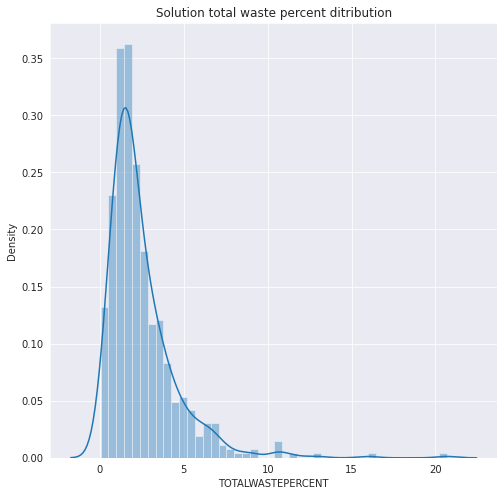

In [9]:
plt.figure(figsize=(8,8))

plt.title('Solution total waste percent ditribution')
sns.distplot(runs['TOTALWASTEPERCENT'])

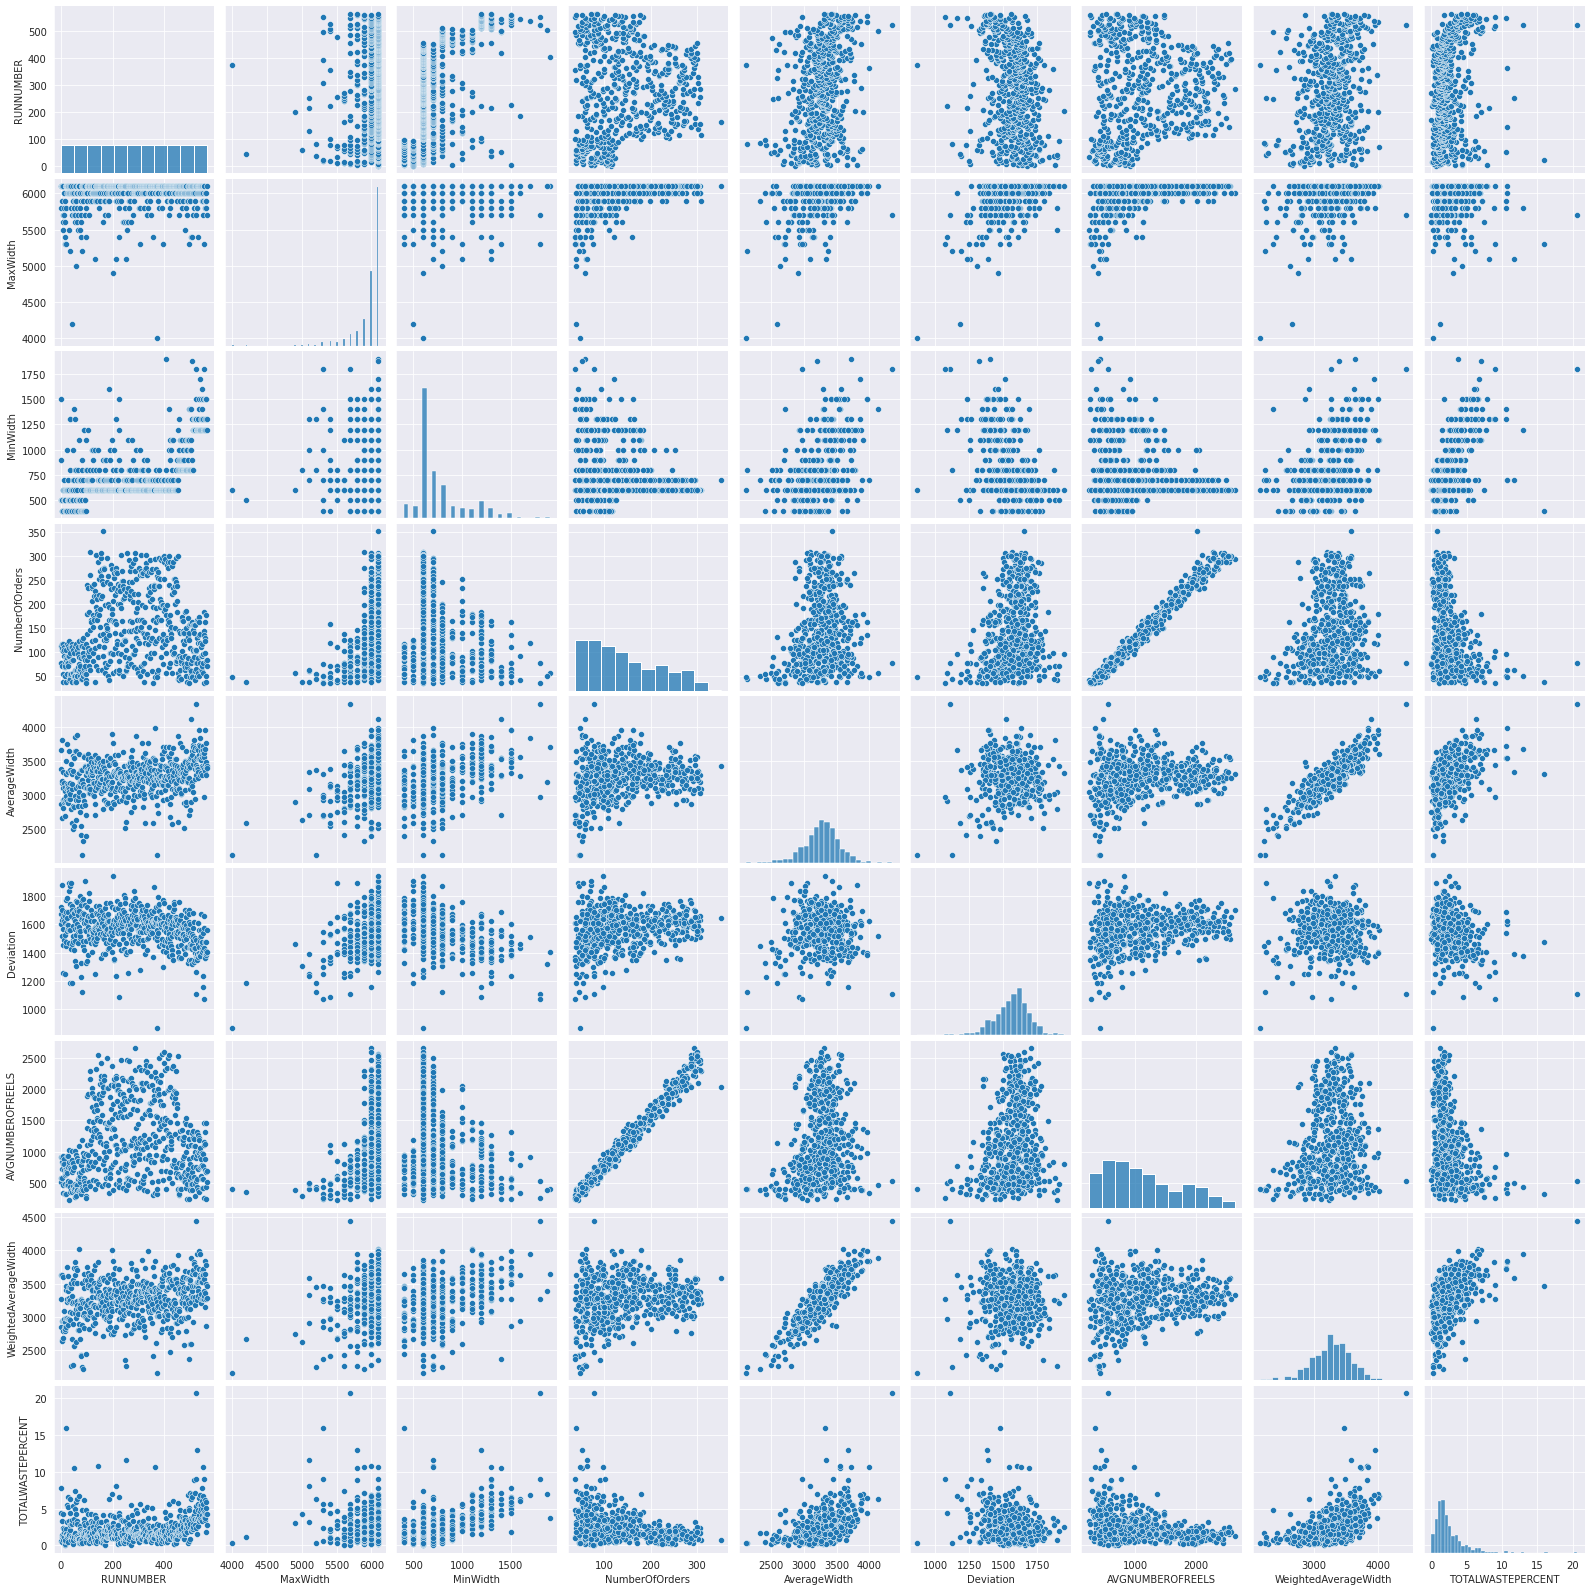

In [10]:
ax = sns.pairplot(runs[runs.columns])

In [11]:
def plot_corr_matrix(datast):
    corrMatrix = datast.corr()
    plt.figure(figsize=(35,15))
    sns.heatmap(corrMatrix, annot=True)
    plt.show()
    

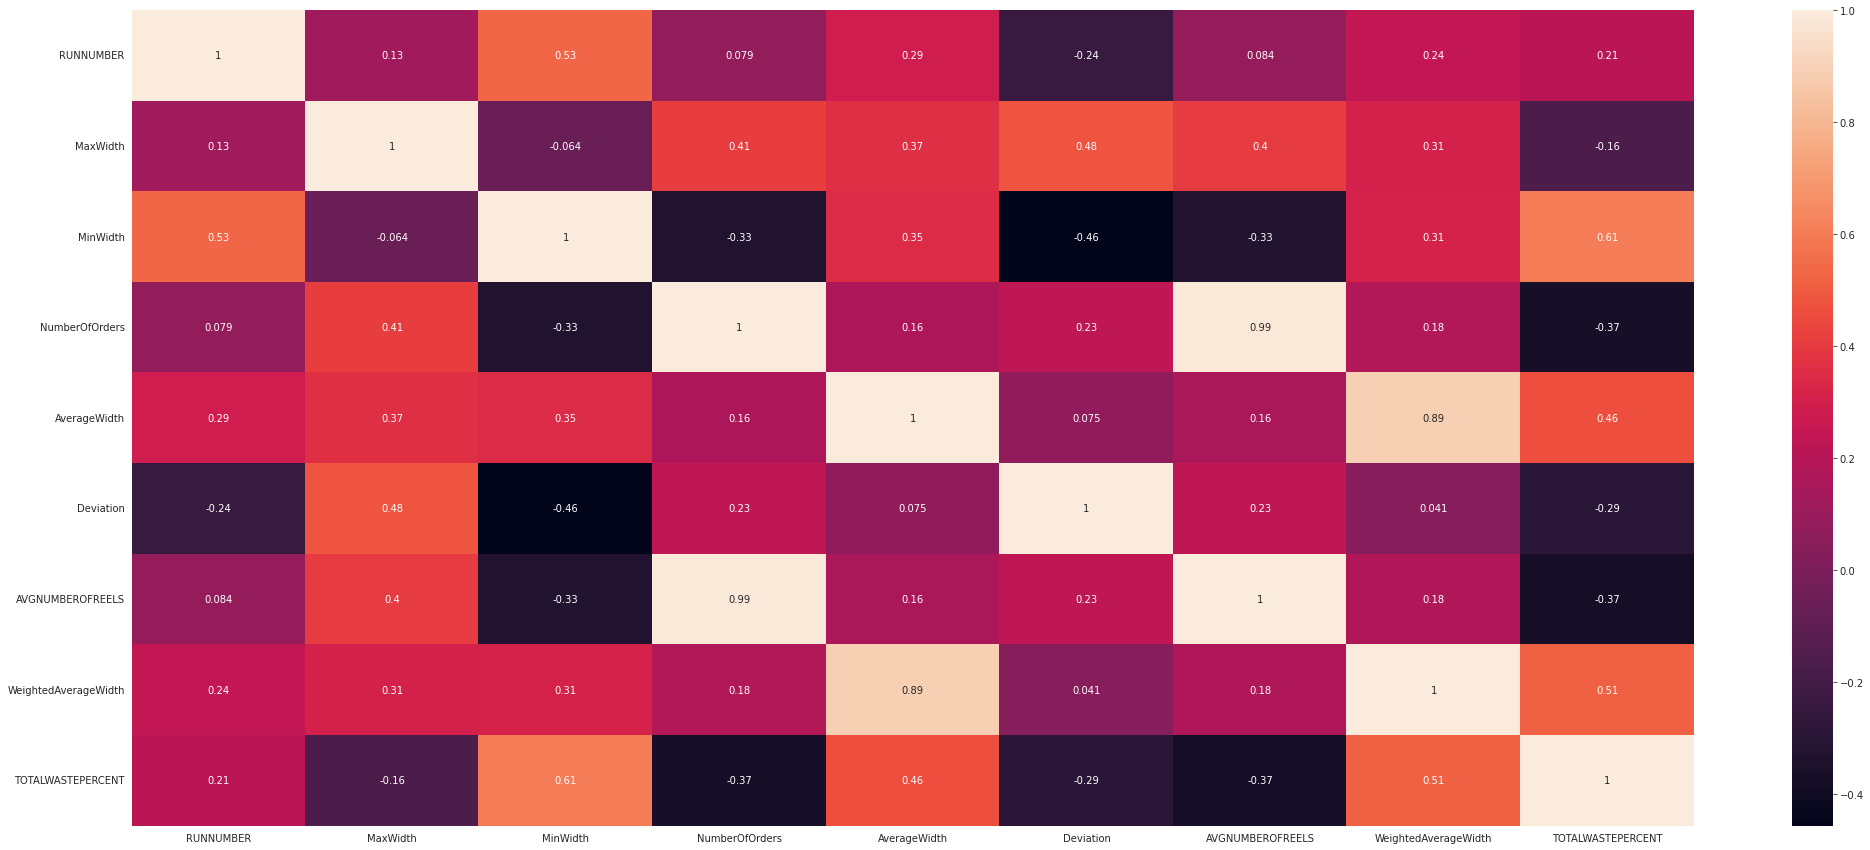

In [12]:
plot_corr_matrix(runs)

We see that average number of reels is highly correlated with number of orders.

### Regression experiments

In [13]:
# Splitting into features and value to be predicted
X = runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'NumberOfOrders'])
y = runs['TOTALWASTEPERCENT']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [15]:
from sklearn import metrics
def regression_model_metrics(y_test, y_pred):
  return metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [16]:
def get_model_prediction_time(model, x_to_test):
  start = datetime.now()
  prd = model.predict(x_to_test)
  end = datetime.now()
  time_difference = (end-start).total_seconds()
  return time_difference/len(x_to_test)

In [17]:
def test_regression_model(model, l_x_train, l_x_test, l_y_train, l_y_test):
  model.fit(l_x_train, l_y_train)
  prediction_time = get_model_prediction_time(model, l_x_test)
  mean_absolute_error, mean_squared_error, root_mean_square_error = regression_model_metrics(l_y_test, model.predict(l_x_test))
  return mean_absolute_error, mean_squared_error, root_mean_square_error, prediction_time

In [18]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.preprocessing import PolynomialFeatures

def test_regression_models(l_x_train, l_x_test, l_y_train, l_y_test):
  names_list = []
  mean_absolute_error_list = []
  mean_square_error_list = []
  root_mean_square_error_list = []
  prediction_time_list = []

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), X_train, X_test, y_train, y_test)
  names_list.append('Linear regression')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)


  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(SGDRegressor(), X_train, X_test, y_train, y_test)
  names_list.append('SGD regressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)
  
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(ElasticNet(), X_train, X_test, y_train, y_test)
  names_list.append('ElasticNet')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(BayesianRidge(), X_train, X_test, y_train, y_test)
  names_list.append('BayesianRidge')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(RandomForestRegressor(), X_train, X_test, y_train, y_test)
  names_list.append('RandomForestRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)
  names_list.append('DecisionTreeRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(XGBRFRegressor(), X_train, X_test, y_train, y_test)
  names_list.append('XGBRFRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  poly_reg = PolynomialFeatures(degree=2)
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), poly_reg.fit_transform(X_train), poly_reg.transform(X_test), y_train, y_test)
  names_list.append('Polynomial regression 2nd degree')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)
  
  poly_reg = PolynomialFeatures(degree=3)
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), poly_reg.fit_transform(X_train), poly_reg.transform(X_test), y_train, y_test)
  names_list.append('Polynomial regression 3nd degree')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  # initialize data of lists.
  data = {'Model name':names_list,
          'Mean absolute error':mean_absolute_error_list,
          'Mean square error':mean_square_error_list,
          'Root mean square error':root_mean_square_error_list,
          'Prediction time (s)': prediction_time_list
          }
  return pd.DataFrame.from_dict(data).sort_values(by=['Mean absolute error'])


In [19]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[19:50:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
results

Model name  ...  Prediction time (s)
7  Polynomial regression 2nd degree  ...             0.000001
4             RandomForestRegressor  ...             0.000090
0                 Linear regression  ...             0.000024
2                        ElasticNet  ...             0.000012
3                     BayesianRidge  ...             0.000011
6                    XGBRFRegressor  ...             0.000012
8  Polynomial regression 3nd degree  ...             0.000049
5             DecisionTreeRegressor  ...             0.000014
1                     SGD regressor  ...             0.000011

[9 rows x 5 columns]

## Experiments with dataset with statistical values for the every jumbo n/10 of the input

Dataset describes the orders of each run using statistical values like:

1.   Number of orders
2.   Number of Distinct widths (orders)
3.   Maximum width of run
4.   Minimum width of run
5.   Average width of orders
6.   Number of reels requested from each order (Average bettween the actual and the upper/over tolerances)
7.   Total waste percentage of solution

###Data visualization and preprocessing


In [21]:
extended_dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/StatisticalOnSeparatedJumboDataset.csv'

In [22]:
extended_runs = pd.read_csv(extended_dataset_url, sep=';')

In [23]:
extended_runs.head()

RUNNUMBER  MaxWidth  ...  WeightedAverage10  TOTALWASTEPERCENT
0          1      6100  ...        5923.613051           0.628959
1          2      5800  ...                NaN           4.398778
2          3      6100  ...        6100.000000           7.828784
3          4      6100  ...        6024.354423           3.385417
4          5      6100  ...        5990.640015           1.081588

[5 rows x 87 columns]

In [24]:
extended_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RUNNUMBER                564 non-null    int64  
 1   MaxWidth                 564 non-null    int64  
 2   MinWidth                 564 non-null    int64  
 3   NumberOfOrders           564 non-null    int64  
 4   AverageWidth             564 non-null    float64
 5   Deviation                564 non-null    float64
 6   W1                       564 non-null    int64  
 7   W2                       564 non-null    int64  
 8   W3                       564 non-null    int64  
 9   W4                       564 non-null    int64  
 10  W5                       564 non-null    int64  
 11  W6                       564 non-null    int64  
 12  W7                       564 non-null    int64  
 13  W8                       564 non-null    int64  
 14  W9                       5

In [25]:
extended_runs.drop(columns=['RUNNUMBER']).describe()

MaxWidth     MinWidth  ...  WeightedAverage10  TOTALWASTEPERCENT
count   564.000000   564.000000  ...         500.000000         564.000000
mean   5974.290780   760.948582  ...        5957.727406           2.491932
std     224.507419   272.497552  ...          86.037155           2.100439
min    4000.000000   400.000000  ...        5700.000000           0.032345
25%    6000.000000   600.000000  ...        5900.000000           1.211506
50%    6100.000000   600.000000  ...        5958.777227           1.883947
75%    6100.000000   800.000000  ...        6014.031210           3.172152
max    6100.000000  1900.000000  ...        6100.000000          20.675751

[8 rows x 86 columns]

In [26]:
extended_runs = extended_runs.fillna(0)

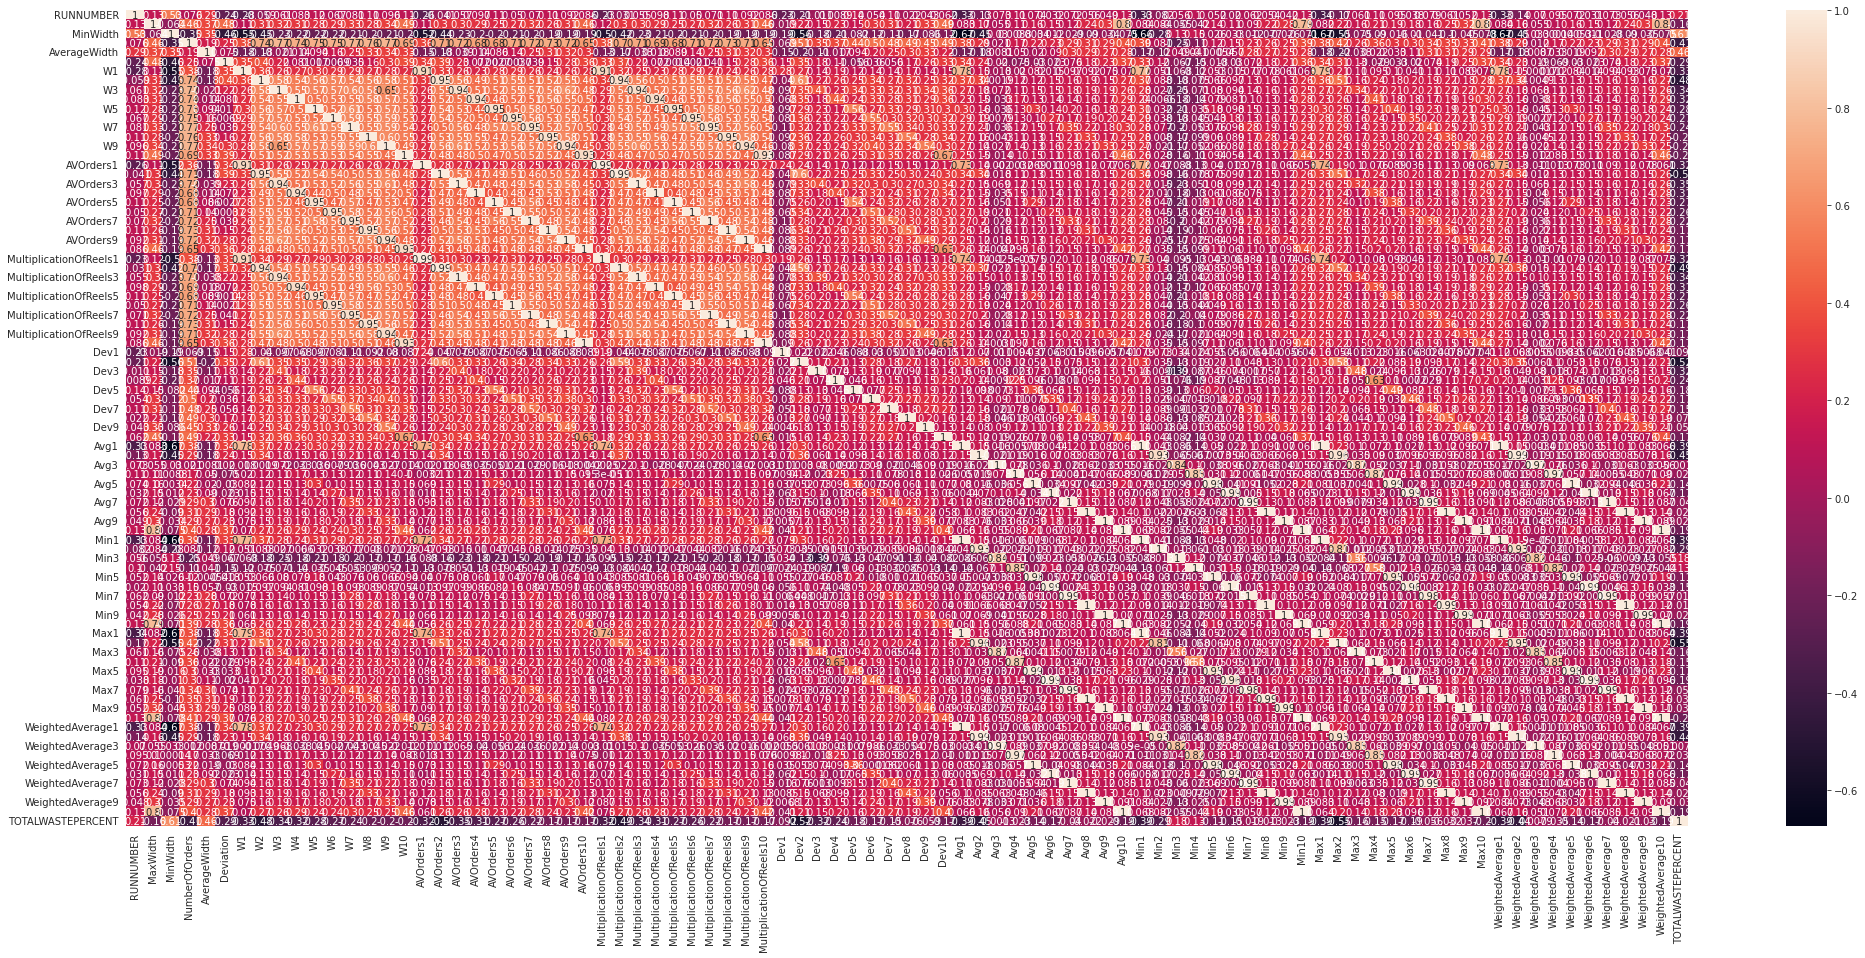

In [27]:
plot_corr_matrix(extended_runs)

### Regression experiments

In [28]:
# Splitting into features and value to be predicted
X = extended_runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'NumberOfOrders'])
y = extended_runs['TOTALWASTEPERCENT']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [30]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[19:51:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [31]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000098
0                 Linear regression  ...             0.000132
3                     BayesianRidge  ...             0.000076
2                        ElasticNet  ...             0.000089
6                    XGBRFRegressor  ...             0.000018
5             DecisionTreeRegressor  ...             0.000015
7  Polynomial regression 2nd degree  ...             0.000008
8  Polynomial regression 3nd degree  ...             0.000159
1                     SGD regressor  ...             0.000091

[9 rows x 5 columns]

# Classification experiments

Define classes method

In [34]:
def classification_condition(row):
  total_waste_value = row['TOTALWASTEPERCENT']
  if total_waste_value < 1:
    return 0
  if total_waste_value < 2:
    return 1
  return 2

## Classification experiments with dataset with statistical values for the whole jumbo

In [35]:
runs['Class'] = runs.apply (lambda row: classification_condition(row), axis=1)

### Experiments with original data

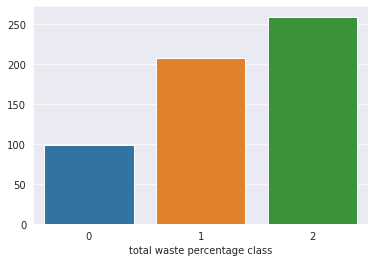

In [36]:
# Checking if Data is balanced
xs = runs['Class'].value_counts().index
ys = runs['Class'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("total waste percentage class")
plt.show()

Define methods:

*   Print metrics
*   Test model



In [37]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

def print_metrics(actual, prediction, model, x_test, y_test):
  print(f"Accuracy Score : {round(accuracy_score(actual, prediction) * 100, 2)}%")
  print(classification_report(actual, prediction))
  plot_confusion_matrix(model, x_test, y_test, cmap=cmap)
  plt.grid(False)
  plt.show()

In [38]:
def test_model(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)
  preds = model.predict(xtest)
  print_metrics(ytest, preds, model, xtest, ytest)

In [39]:
# Splitting into features and value to be predicted
X = runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'Class'])
y = runs['Class']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [42]:
def test_classification_models(l_x_train, l_x_test, l_y_train, l_y_test):
  print('Logistic regression')
  print('--------------------')
  print('--------------------')
  log_reg = LogisticRegression()
  test_model(log_reg, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Gaussian NB')
  print('--------------------')
  print('--------------------')
  nb = GaussianNB()
  test_model(nb, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Random forest classifier')
  print('--------------------')
  print('--------------------')
  rf = RandomForestClassifier()
  test_model(rf, l_x_train, l_y_train, l_x_test, l_y_test)
  print('XGB classifier')
  print('--------------------')
  print('--------------------')
  xgb = XGBClassifier()
  test_model(xgb, l_x_train, l_y_train, l_x_test, l_y_test)
  print('K neighbors')
  print('--------------------')
  print('--------------------')
  knn = KNeighborsClassifier()
  test_model(knn, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Decision tree classifier')
  print('--------------------')
  print('--------------------')
  dt = DecisionTreeClassifier()
  test_model(dt, l_x_train, l_y_train, l_x_test, l_y_test)
  print('SVM')
  print('--------------------')
  print('--------------------')
  svc =  SVC()
  test_model(svc, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Linear discriminant analysis')
  print('--------------------')
  print('--------------------')
  linear_disc = LinearDiscriminantAnalysis()
  test_model(linear_disc, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Decision tree classifier')
  print('--------------------')
  print('--------------------')
  decision_trees = DecisionTreeClassifier()
  test_model(linear_disc, l_x_train, l_y_train, l_x_test, l_y_test)

In [43]:
test_regression_models(X_train, X_test, y_train, y_test)

[19:52:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000085
6                    XGBRFRegressor  ...             0.000008
0                 Linear regression  ...             0.000018
3                     BayesianRidge  ...             0.000011
2                        ElasticNet  ...             0.000012
5             DecisionTreeRegressor  ...             0.000019
7  Polynomial regression 2nd degree  ...             0.000001
8  Polynomial regression 3nd degree  ...             0.000037
1                     SGD regressor  ...             0.000012

[9 rows x 5 columns]

### Experiments with oversampled data


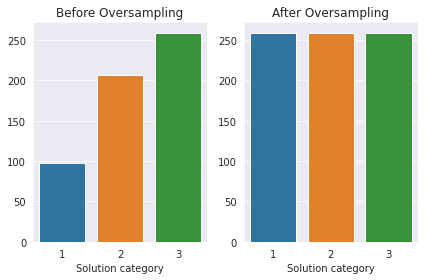

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['1', '2', '3'], y =[sum(y == 0), sum(y == 1), sum(y == 2)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Solution category')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X_oversampled, y_oversampled = sm.fit_resample(X, y) 

sns.barplot(x=['1', '2', '3'], y =[sum(y_oversampled == 0), sum(y_oversampled == 1), sum(y_oversampled == 2)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Solution category')

plt.tight_layout()
plt.show()

In [45]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 66.67%
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        52
           1       0.60      0.52      0.56        56
           2       0.82      0.85      0.84        48

    accuracy                           0.67       156
   macro avg       0.67      0.68      0.67       156
weighted avg       0.66      0.67      0.66       156



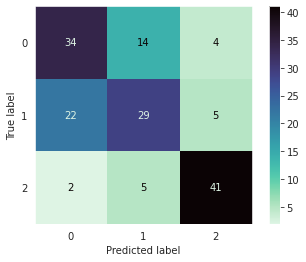

Gaussian NB
--------------------
--------------------
Accuracy Score : 66.67%
              precision    recall  f1-score   support

           0       0.70      0.62      0.65        52
           1       0.56      0.68      0.61        56
           2       0.81      0.71      0.76        48

    accuracy                           0.67       156
   macro avg       0.69      0.67      0.67       156
weighted avg       0.68      0.67      0.67       156



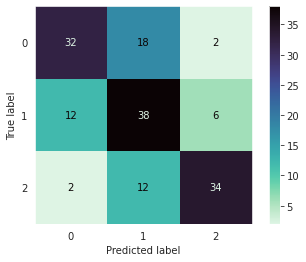

Random forest classifier
--------------------
--------------------
Accuracy Score : 76.28%
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        52
           1       0.73      0.62      0.67        56
           2       0.79      0.79      0.79        48

    accuracy                           0.76       156
   macro avg       0.76      0.77      0.76       156
weighted avg       0.76      0.76      0.76       156



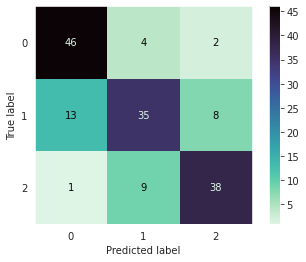

XGB classifier
--------------------
--------------------
Accuracy Score : 73.72%
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        52
           1       0.69      0.61      0.65        56
           2       0.78      0.81      0.80        48

    accuracy                           0.74       156
   macro avg       0.74      0.74      0.74       156
weighted avg       0.73      0.74      0.73       156



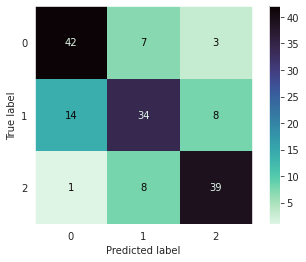

K neighbors
--------------------
--------------------
Accuracy Score : 76.28%
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        52
           1       0.73      0.59      0.65        56
           2       0.90      0.77      0.83        48

    accuracy                           0.76       156
   macro avg       0.78      0.77      0.76       156
weighted avg       0.77      0.76      0.76       156



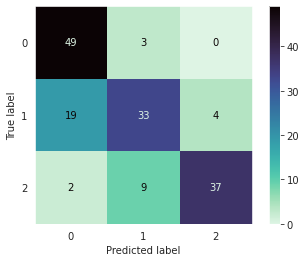

Decision tree classifier
--------------------
--------------------
Accuracy Score : 66.03%
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        52
           1       0.58      0.45      0.51        56
           2       0.66      0.69      0.67        48

    accuracy                           0.66       156
   macro avg       0.65      0.67      0.65       156
weighted avg       0.65      0.66      0.65       156



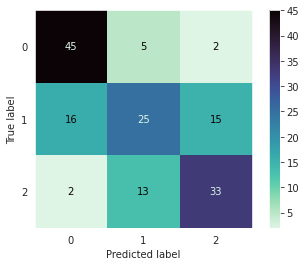

SVM
--------------------
--------------------
Accuracy Score : 66.67%
              precision    recall  f1-score   support

           0       0.63      0.56      0.59        52
           1       0.60      0.57      0.59        56
           2       0.75      0.90      0.82        48

    accuracy                           0.67       156
   macro avg       0.66      0.67      0.67       156
weighted avg       0.66      0.67      0.66       156



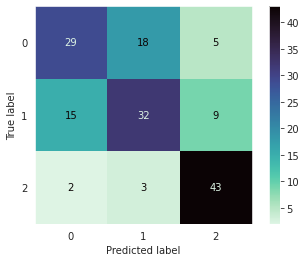

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 69.87%
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        52
           1       0.65      0.55      0.60        56
           2       0.85      0.85      0.85        48

    accuracy                           0.70       156
   macro avg       0.71      0.71      0.70       156
weighted avg       0.70      0.70      0.70       156



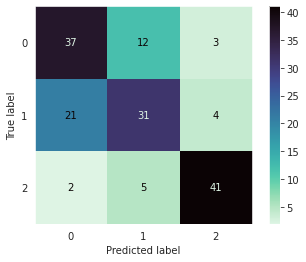

Decision tree classifier
--------------------
--------------------
Accuracy Score : 69.87%
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        52
           1       0.65      0.55      0.60        56
           2       0.85      0.85      0.85        48

    accuracy                           0.70       156
   macro avg       0.71      0.71      0.70       156
weighted avg       0.70      0.70      0.70       156



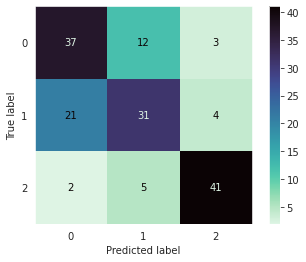

In [46]:
test_classification_models(X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled)

## Classification experiments with dataset with statistical values for the every jumbo n/10 of the input

### Experiments with original data

In [47]:
extended_runs['Class'] = extended_runs.apply (lambda row: classification_condition(row), axis=1)

In [48]:
# Splitting into features and value to be predicted
X = extended_runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'Class'])
y = extended_runs['Class']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 55.75%
              precision    recall  f1-score   support

           0       0.60      0.12      0.19        26
           1       0.37      0.62      0.46        34
           2       0.76      0.74      0.75        53

    accuracy                           0.56       113
   macro avg       0.58      0.49      0.47       113
weighted avg       0.61      0.56      0.54       113



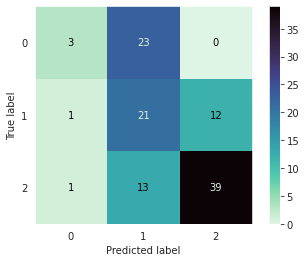

Gaussian NB
--------------------
--------------------
Accuracy Score : 61.06%
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        26
           1       0.49      0.71      0.58        34
           2       0.80      0.68      0.73        53

    accuracy                           0.61       113
   macro avg       0.59      0.58      0.57       113
weighted avg       0.63      0.61      0.61       113



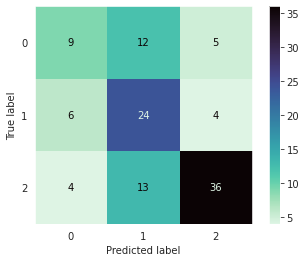

Random forest classifier
--------------------
--------------------
Accuracy Score : 65.49%
              precision    recall  f1-score   support

           0       0.67      0.15      0.25        26
           1       0.48      0.76      0.59        34
           2       0.83      0.83      0.83        53

    accuracy                           0.65       113
   macro avg       0.66      0.58      0.56       113
weighted avg       0.69      0.65      0.62       113



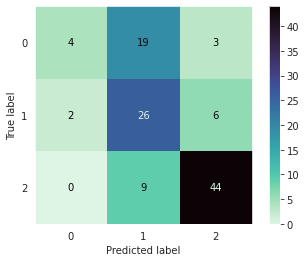

XGB classifier
--------------------
--------------------
Accuracy Score : 66.37%
              precision    recall  f1-score   support

           0       0.73      0.31      0.43        26
           1       0.49      0.71      0.58        34
           2       0.81      0.81      0.81        53

    accuracy                           0.66       113
   macro avg       0.68      0.61      0.61       113
weighted avg       0.70      0.66      0.65       113



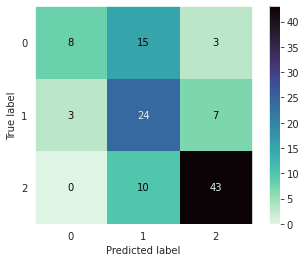

K neighbors
--------------------
--------------------
Accuracy Score : 56.64%
              precision    recall  f1-score   support

           0       0.32      0.27      0.29        26
           1       0.46      0.53      0.49        34
           2       0.75      0.74      0.74        53

    accuracy                           0.57       113
   macro avg       0.51      0.51      0.51       113
weighted avg       0.56      0.57      0.56       113



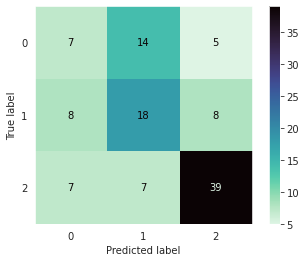

Decision tree classifier
--------------------
--------------------
Accuracy Score : 61.95%
              precision    recall  f1-score   support

           0       0.44      0.27      0.33        26
           1       0.52      0.65      0.58        34
           2       0.75      0.77      0.76        53

    accuracy                           0.62       113
   macro avg       0.57      0.56      0.56       113
weighted avg       0.61      0.62      0.61       113



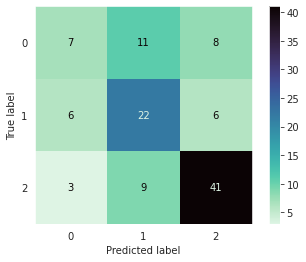

SVM
--------------------
--------------------
Accuracy Score : 59.29%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.56      0.56      0.56        34
           2       0.61      0.91      0.73        53

    accuracy                           0.59       113
   macro avg       0.39      0.49      0.43       113
weighted avg       0.45      0.59      0.51       113



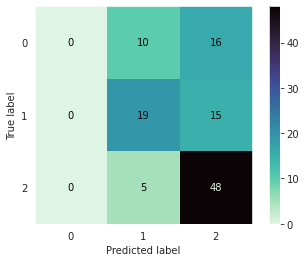

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 63.72%
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.49      0.68      0.57        34
           2       0.83      0.75      0.79        53

    accuracy                           0.64       113
   macro avg       0.61      0.59      0.59       113
weighted avg       0.65      0.64      0.64       113



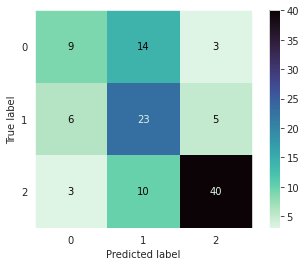

Decision tree classifier
--------------------
--------------------
Accuracy Score : 63.72%
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.49      0.68      0.57        34
           2       0.83      0.75      0.79        53

    accuracy                           0.64       113
   macro avg       0.61      0.59      0.59       113
weighted avg       0.65      0.64      0.64       113



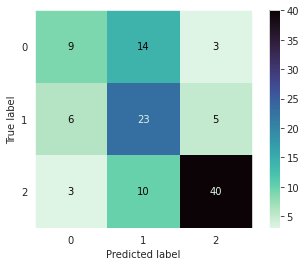

In [50]:
test_classification_models(X_train, X_test, y_train, y_test)

### Experiments with oversampled data


In [51]:
sm = SMOTE(random_state = 2) 
X_oversampled, y_oversampled = sm.fit_resample(X, y) 

In [52]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 67.31%
              precision    recall  f1-score   support

           0       0.61      0.79      0.69        52
           1       0.64      0.48      0.55        56
           2       0.79      0.77      0.78        48

    accuracy                           0.67       156
   macro avg       0.68      0.68      0.67       156
weighted avg       0.68      0.67      0.67       156



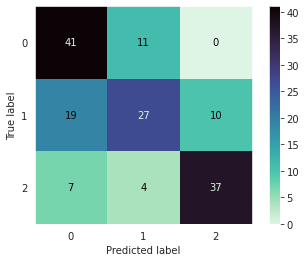

Gaussian NB
--------------------
--------------------
Accuracy Score : 60.26%
              precision    recall  f1-score   support

           0       0.58      0.48      0.53        52
           1       0.57      0.66      0.61        56
           2       0.67      0.67      0.67        48

    accuracy                           0.60       156
   macro avg       0.61      0.60      0.60       156
weighted avg       0.60      0.60      0.60       156



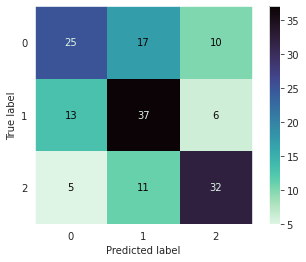

Random forest classifier
--------------------
--------------------
Accuracy Score : 79.49%
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        52
           1       0.77      0.73      0.75        56
           2       0.76      0.81      0.79        48

    accuracy                           0.79       156
   macro avg       0.79      0.80      0.80       156
weighted avg       0.80      0.79      0.79       156



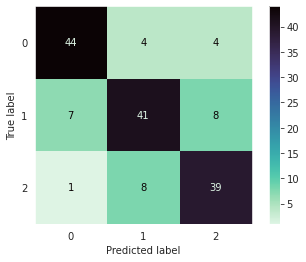

XGB classifier
--------------------
--------------------
Accuracy Score : 76.28%
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        52
           1       0.78      0.62      0.69        56
           2       0.75      0.88      0.81        48

    accuracy                           0.76       156
   macro avg       0.76      0.77      0.76       156
weighted avg       0.76      0.76      0.76       156



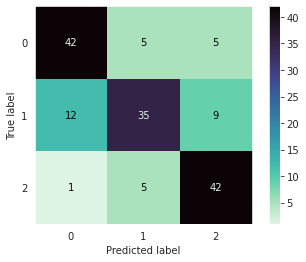

K neighbors
--------------------
--------------------
Accuracy Score : 62.82%
              precision    recall  f1-score   support

           0       0.56      0.88      0.69        52
           1       0.62      0.45      0.52        56
           2       0.79      0.56      0.66        48

    accuracy                           0.63       156
   macro avg       0.66      0.63      0.62       156
weighted avg       0.66      0.63      0.62       156



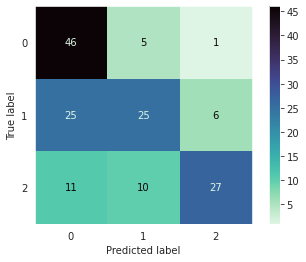

Decision tree classifier
--------------------
--------------------
Accuracy Score : 59.62%
              precision    recall  f1-score   support

           0       0.57      0.71      0.63        52
           1       0.58      0.46      0.51        56
           2       0.65      0.62      0.64        48

    accuracy                           0.60       156
   macro avg       0.60      0.60      0.60       156
weighted avg       0.60      0.60      0.59       156



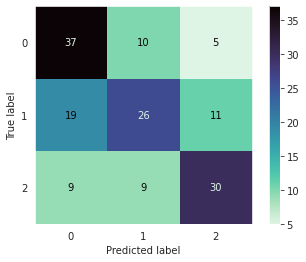

SVM
--------------------
--------------------
Accuracy Score : 67.31%
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        52
           1       0.74      0.45      0.56        56
           2       0.69      0.90      0.78        48

    accuracy                           0.67       156
   macro avg       0.68      0.68      0.67       156
weighted avg       0.68      0.67      0.66       156



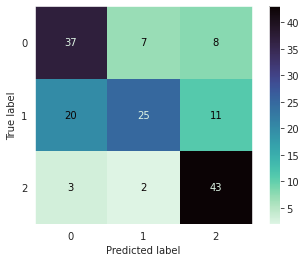

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 72.44%
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        52
           1       0.71      0.54      0.61        56
           2       0.87      0.81      0.84        48

    accuracy                           0.72       156
   macro avg       0.74      0.73      0.73       156
weighted avg       0.74      0.72      0.72       156



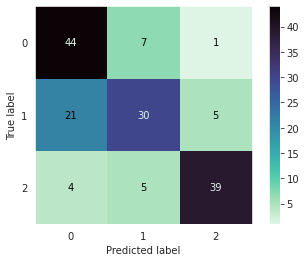

Decision tree classifier
--------------------
--------------------
Accuracy Score : 72.44%
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        52
           1       0.71      0.54      0.61        56
           2       0.87      0.81      0.84        48

    accuracy                           0.72       156
   macro avg       0.74      0.73      0.73       156
weighted avg       0.74      0.72      0.72       156



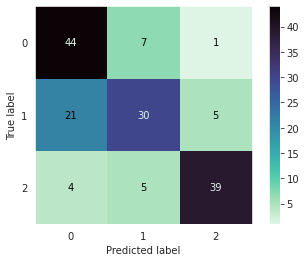

In [53]:
test_classification_models(X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled)

# Exploratory regression experiments with statistical values for the whole jumbo

In [54]:
X = runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'NumberOfOrders', 'Class'])
y = runs['TOTALWASTEPERCENT']

In [55]:
X

MaxWidth  MinWidth  ...  AVGNUMBEROFREELS  WeightedAverageWidth
0        6100       500  ...        914.380037           2841.885883
1        5800       900  ...        527.073171           3267.406710
2        6100      1500  ...        578.356221           3635.490177
3        6100       500  ...        588.075038           3634.856429
4        6100       400  ...        835.282809           2654.450214
..        ...       ...  ...               ...                   ...
559      6000      1500  ...        249.586314           2861.050278
560      5900      1200  ...       1465.970295           3785.334810
561      5800      1300  ...        684.963969           3268.778311
562      5700      1200  ...        524.079826           3465.263706
563      6100      1300  ...        702.826494           3279.632655

[564 rows x 6 columns]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [57]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[19:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [58]:
results

Model name  ...  Prediction time (s)
7  Polynomial regression 2nd degree  ...             0.000002
4             RandomForestRegressor  ...             0.000111
0                 Linear regression  ...             0.000018
2                        ElasticNet  ...             0.000012
3                     BayesianRidge  ...             0.000012
6                    XGBRFRegressor  ...             0.000009
8  Polynomial regression 3nd degree  ...             0.000003
5             DecisionTreeRegressor  ...             0.000017
1                     SGD regressor  ...             0.000013

[9 rows x 5 columns]

## Results with stratified K fold validation

In [59]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.preprocessing import PolynomialFeatures
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def test_regression_models_with_K_Fold_Validation(l_x, l_y, k = 10, repeats = 3):
  results = {}
  names_list = []
  mean_absolute_error_score = []
  # prepare the cross-validation procedure
  cv = RepeatedKFold(n_splits=k, n_repeats=repeats, random_state=1)

  names_list.append('Linear regression')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('SGD regressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(SGDRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('ElasticNet')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(ElasticNet(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('BayesianRidge')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(BayesianRidge(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('RandomForestRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(RandomForestRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('DecisionTreeRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(DecisionTreeRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('XGBRFRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(XGBRFRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('Polynomial regression 2nd degree')
  poly_reg = PolynomialFeatures(degree=2)
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), poly_reg.fit_transform(l_x), l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('Polynomial regression 3nd degree')
  poly_reg = PolynomialFeatures(degree=3)
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), poly_reg.fit_transform(l_x), l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  data = {'Model name':names_list,
          'Mean absolute error':mean_absolute_error_score}
          
  return pd.DataFrame.from_dict(data).sort_values(by=['Mean absolute error'])

In [ ]:
results = test_regression_models_with_K_Fold_Validation(X, y)

In [ ]:
results

Model name  Mean absolute error
4             RandomForestRegressor         8.145199e-01
7  Polynomial regression 2nd degree         8.252179e-01
6                    XGBRFRegressor         8.660576e-01
3                     BayesianRidge         9.025460e-01
2                        ElasticNet         9.042308e-01
0                 Linear regression         9.052230e-01
8  Polynomial regression 3nd degree         9.227676e-01
5             DecisionTreeRegressor         1.104688e+00
1                     SGD regressor         2.608106e+16

## Pass input from MinMaxScaler

In [60]:
from sklearn import preprocessing

In [61]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[17:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000116
0                 Linear regression  ...             0.000002
3                     BayesianRidge  ...             0.000001
8  Polynomial regression 3nd degree  ...             0.000038
6                    XGBRFRegressor  ...             0.000004
1                     SGD regressor  ...             0.000002
7  Polynomial regression 2nd degree  ...             0.000002
5             DecisionTreeRegressor  ...             0.000001
2                        ElasticNet  ...             0.000002

[9 rows x 5 columns]

In [ ]:
results = test_regression_models_with_K_Fold_Validation(x_scaled, y)

In [ ]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.814409
7  Polynomial regression 2nd degree             0.861376
6                    XGBRFRegressor             0.866087
1                     SGD regressor             0.875216
3                     BayesianRidge             0.901584
0                 Linear regression             0.905223
8  Polynomial regression 3nd degree             0.927633
5             DecisionTreeRegressor             1.092618
2                        ElasticNet             1.430649

## Pass input from StandardScaler


In [63]:
standardScaler = preprocessing.StandardScaler()
x_standarized = standardScaler.fit_transform(X)


In [64]:
x_standarized = pd.DataFrame(x_standarized, columns=['MaxWidth', 'MinWidth', 'AverageWidth', 'Deviation', 'AVGNUMBEROFREELS', 'WeightedAverageWidth'])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x_standarized, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[17:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
7  Polynomial regression 2nd degree  ...             0.000002
4             RandomForestRegressor  ...             0.000149
0                 Linear regression  ...             0.000047
3                     BayesianRidge  ...             0.000016
1                     SGD regressor  ...             0.000017
6                    XGBRFRegressor  ...             0.000008
5             DecisionTreeRegressor  ...             0.000015
2                        ElasticNet  ...             0.000015
8  Polynomial regression 3nd degree  ...             0.000038

[9 rows x 5 columns]

In [ ]:
results = test_regression_models_with_K_Fold_Validation(x_standarized, y)

In [ ]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.809189
7  Polynomial regression 2nd degree             0.811878
6                    XGBRFRegressor             0.866087
3                     BayesianRidge             0.902194
0                 Linear regression             0.905223
1                     SGD regressor             0.906114
8  Polynomial regression 3nd degree             0.919986
2                        ElasticNet             1.053938
5             DecisionTreeRegressor             1.059647

## Model tuning

In [89]:
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd2
def calculate_feature_importance(l_model, l_x, l_y, use_property_coef = False):
  column_name = 'feature importance'
  if (use_property_coef):
    column_name = 'weights'
  l_x_train, l_x_test, l_y_train, l_y_test = train_test_split(l_x, l_y, test_size=0.20, random_state = 0)
  l_model.fit(l_x_train, l_y_train)
  column_name_list = []
  feature_importance_list = []
  for i in range(len(l_x.columns)):
    column_name_list.append(l_x.columns[i])
    if not use_property_coef:
      feature_importance_list.append(l_model.feature_importances_[i])
      continue
    feature_importance_list.append(l_model.coef_[i])
  # initialize data of lists.
  data = {'Column name':column_name_list,
          column_name :feature_importance_list}
  return pd2.DataFrame.from_dict(data).sort_values(by=[column_name], ascending=False)

### Bayesian ridge regressor tuning

In [ ]:
random_grid = {"n_iter": np.arange(100, 10000, 100),
                      "alpha_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "alpha_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "fit_intercept" : [True, False],
                      "normalize": [True, False]
                      }
br = BayesianRidge()
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(x_standarized, y)
br_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha_1': 1e-06,
 'alpha_2': 1e-05,
 'fit_intercept': True,
 'lambda_1': 0.01,
 'lambda_2': 1e-07,
 'n_iter': 3400,
 'normalize': False}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
br = BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400)
'MAE :%.3f' % (-1*(mean(cross_val_score(br, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.902'

In [ ]:
feature_importance = calculate_feature_importance(BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400), x_standarized, y, True)

In [ ]:
feature_importance

Column name   weights
5  WeightedAverageWidth  0.873235
1              MinWidth  0.720862
2          AverageWidth  0.060494
3             Deviation  0.020927
0              MaxWidth -0.360545
4      AVGNUMBEROFREELS -0.493996

### Random forest regressor tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# Fit the random search model
rf_random.fit(x_standarized, y)
# Fit the random search model
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1600}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(max_depth =90, min_samples_leaf= 1, min_samples_split = 5 ,n_estimators= 1600, max_features= 'auto')
'MAE :%.3f' % (-1*(mean(cross_val_score(rf, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.806'

In [ ]:
feature_importance = calculate_feature_importance(RandomForestRegressor(max_depth =90, min_samples_leaf= 1, min_samples_split = 5 ,n_estimators= 1600, max_features= 'auto'), x_standarized, y)

In [ ]:
feature_importance

Column name  feature importance
1              MinWidth            0.402933
5  WeightedAverageWidth            0.230533
4      AVGNUMBEROFREELS            0.164946
2          AverageWidth            0.076853
3             Deviation            0.075120
0              MaxWidth            0.049615

### Decision tree regressor tuning

In [ ]:
criterion = ['squared_error', 'friedman_mse', "absolute_error", "poisson"]
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(x_standarized, y)
dtr_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'criterion': 'friedman_mse',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'best'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 40, max_features= 'log2', min_samples_leaf=2, min_samples_split=10, splitter= 'best')
'DecisionTreeClassifier after tuning MAE :%.3f' % (-1*(mean(cross_val_score(dtr, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'DecisionTreeClassifier after tuning MAE :1.017'

In [ ]:
feature_importance = calculate_feature_importance(DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 40, max_features= 'log2', min_samples_leaf=2, min_samples_split=10, splitter= 'best'), x_standarized, y)

In [ ]:
feature_importance

Column name  feature importance
2          AverageWidth            0.375729
1              MinWidth            0.250381
4      AVGNUMBEROFREELS            0.188333
5  WeightedAverageWidth            0.074964
0              MaxWidth            0.061042
3             Deviation            0.049552

### Elastic net regressor tuning

In [ ]:
random_grid = {"max_iter": [1, 5, 10, 100, 1000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "selection": ["cyclic", "random"]}
en = ElasticNet()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
en_random.fit(x_standarized, y)
en_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 100, 'selection': 'cyclic'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'ElasticNet after tuning MAE :%.3f' % (-1*(mean(cross_val_score(ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter = 100, selection= 'cyclic'), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'ElasticNet after tuning MAE :0.877'

In [ ]:
feature_importance = calculate_feature_importance(ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter = 100, selection= 'cyclic'), x_standarized, y, True)

In [ ]:
feature_importance

Column name   weights
5  WeightedAverageWidth  0.731233
1              MinWidth  0.678280
2          AverageWidth  0.107199
3             Deviation -0.000000
0              MaxWidth -0.275473
4      AVGNUMBEROFREELS -0.450714

### SGD regressor tuning

In [ ]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l1_ratio = np.arange(0.05, 1.0, 0.05)
max_iter = np.arange(100, 10000, 100)
tolerance = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epsilon = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate =  ['invscaling', 'constant', 'optimal', 'adaptive']

random_grid = {'penalty':penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'tol': tolerance,
               'epsilon': epsilon,
               'learning_rate': learning_rate}
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
sgd_random.fit(x_standarized, y)
sgd_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.001,
 'epsilon': 1e-05,
 'l1_ratio': 0.05,
 'learning_rate': 'constant',
 'max_iter': 4000,
 'penalty': 'elasticnet',
 'tol': 1e-06}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'SGD after tuning MAE :%.3f' % (-1*(mean(cross_val_score(SGDRegressor(alpha=0.001, l1_ratio=0.05, epsilon=1e-05, learning_rate='constant', max_iter = 4000, penalty= 'l2', tol=1e-06), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'SGD after tuning MAE :0.912'

In [ ]:
feature_importance = calculate_feature_importance(SGDRegressor(alpha=0.001, l1_ratio=0.05, epsilon=1e-05, learning_rate='constant', max_iter = 4000, penalty= 'l2', tol=1e-06), x_standarized, y, True)

In [ ]:
feature_importance

Column name   weights
5  WeightedAverageWidth  0.921044
1              MinWidth  0.782058
2          AverageWidth  0.049872
3             Deviation  0.032639
0              MaxWidth -0.326892
4      AVGNUMBEROFREELS -0.645034

## Deep learning experiments

Import pre required libraries

In [66]:
import tensorflow as tf
from tensorflow.keras import Sequential as seq
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(42)

In [ ]:
def plot_loss_and_val_loss(hist, loss_label = 'Mean Absolute Error (MAE)', title=''):
  fig, ax1 = plt.subplots(1, 1)
  ax1.plot(hist.epoch, hist.history['loss'], color='b', label='Loss')
  ax1.plot(hist.epoch, hist.history['val_loss'], color='orange', label='Val_loss')
  ax1.set_xticks(range(0, len(hist.epoch)))
  ax1.set_title('Training Error ' + title )
  ax1.set_ylabel(loss_label, fontsize=12)
  ax1.set_xlabel('#Epoch', fontsize=12)
  fig.set_size_inches(18.5, 10.5)
  plt.legend()
  plt.show()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

In [ ]:
epochs = 4000
batch_size = 2

In [ ]:
X

MaxWidth  MinWidth  ...  AVGNUMBEROFREELS  WeightedAverageWidth
0        6100       500  ...        914.380037           2841.885883
1        5800       900  ...        527.073171           3267.406710
2        6100      1500  ...        578.356221           3635.490177
3        6100       500  ...        588.075038           3634.856429
4        6100       400  ...        835.282809           2654.450214
..        ...       ...  ...               ...                   ...
559      6000      1500  ...        249.586314           2861.050278
560      5900      1200  ...       1465.970295           3785.334810
561      5800      1300  ...        684.963969           3268.778311
562      5700      1200  ...        524.079826           3465.263706
563      6100      1300  ...        702.826494           3279.632655

[564 rows x 6 columns]

### Single dense model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 58.
Epoch 00068: early stopping


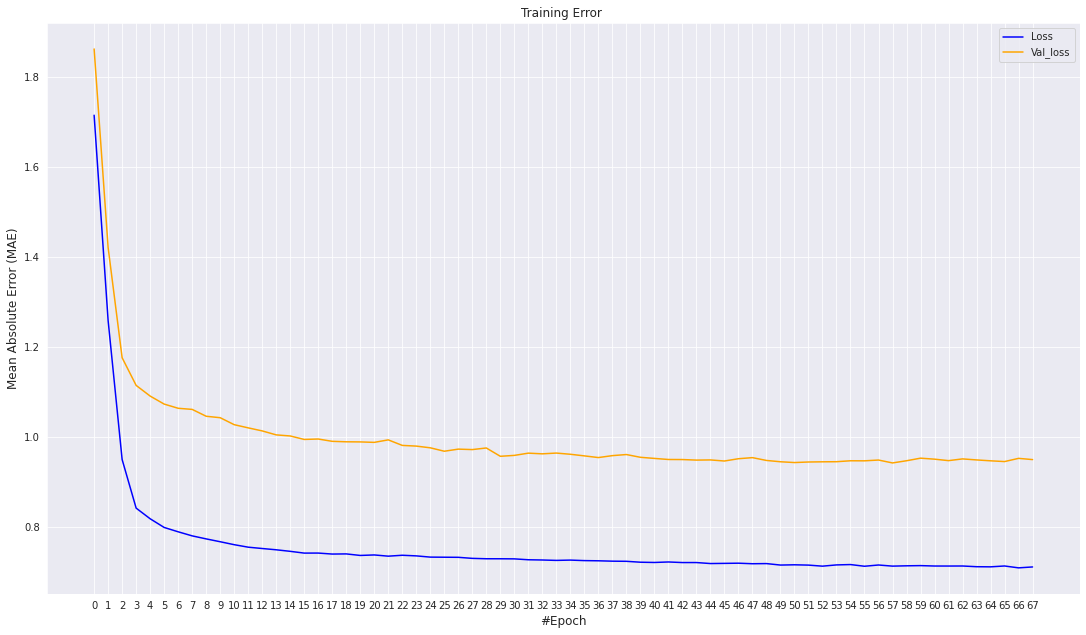

In [ ]:
plot_loss_and_val_loss(hist)

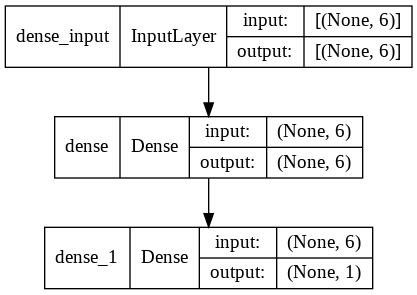

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.94904625415802'

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 46.
Epoch 00056: early stopping


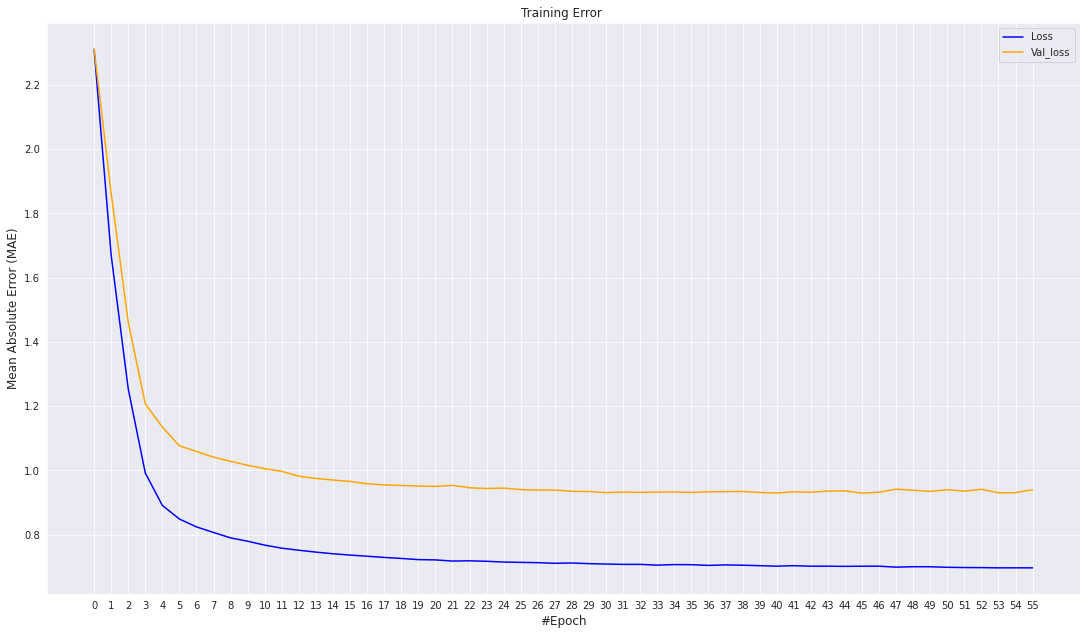

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.9400796890258789'

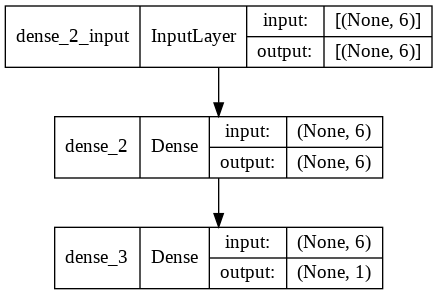

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Two denses model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 50.
Epoch 00060: early stopping


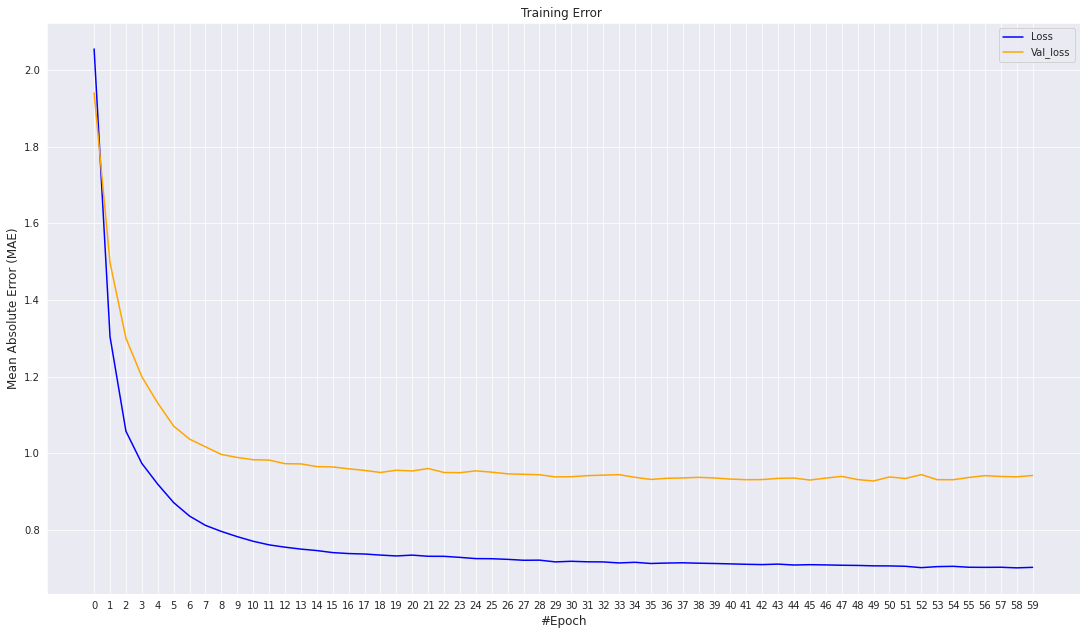

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.9418059587478638'

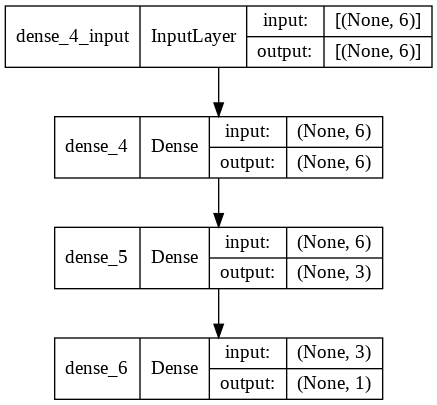

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 54.
Epoch 00064: early stopping


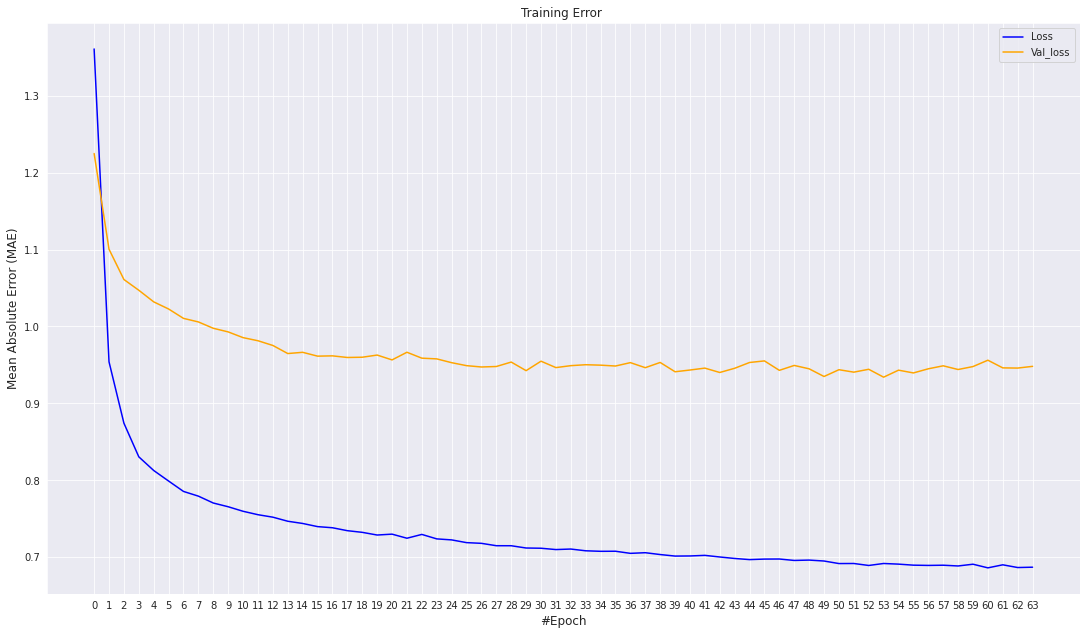

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.9481889605522156'

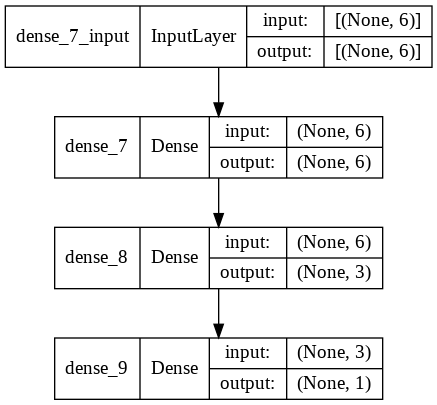

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Three denses model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 41.
Epoch 00051: early stopping


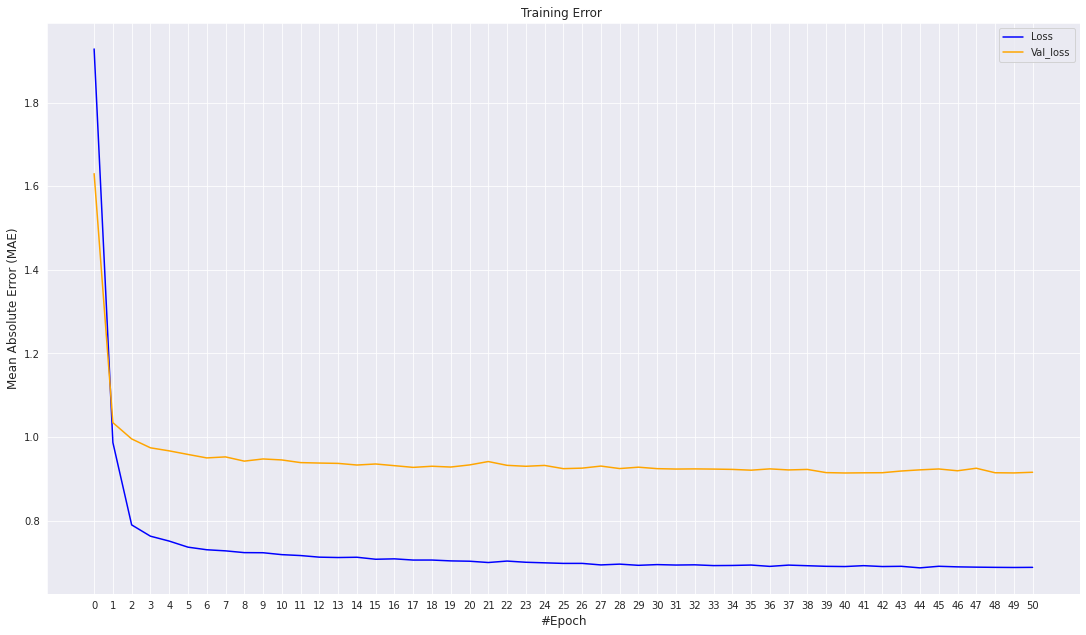

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.9155588746070862'

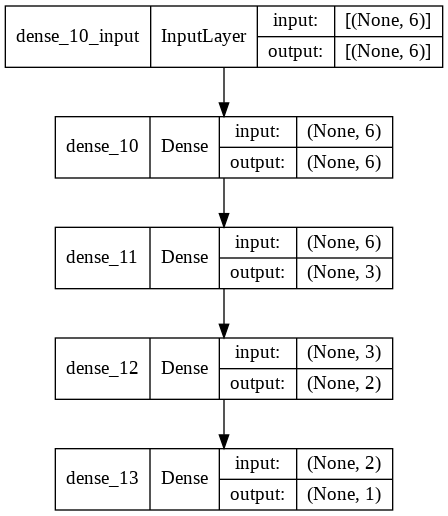

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 226.
Epoch 00236: early stopping


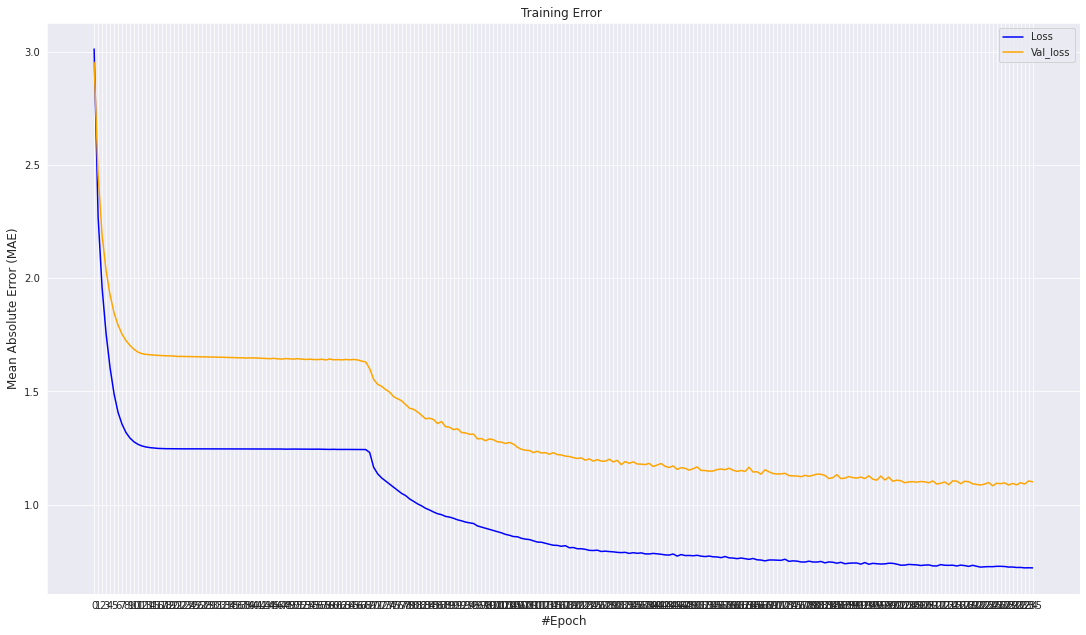

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.1007156372070312'

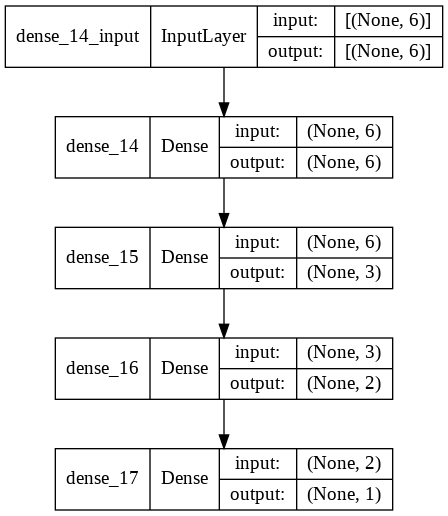

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(12, activation = 'relu', input_dim = 6))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 1.
Epoch 00011: early stopping


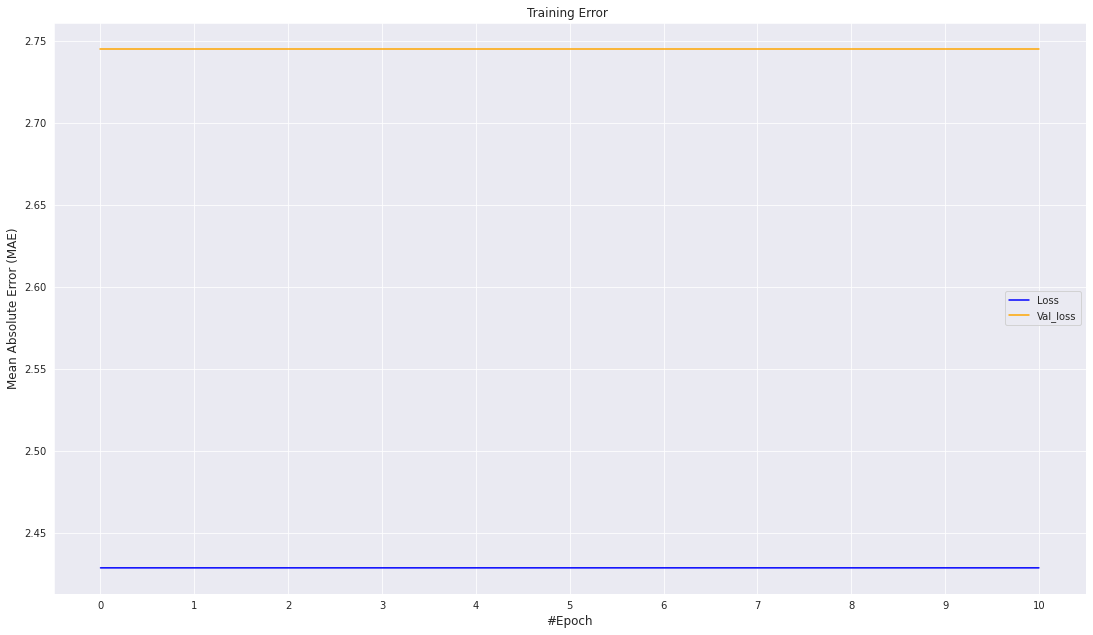

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 2.7452518939971924'

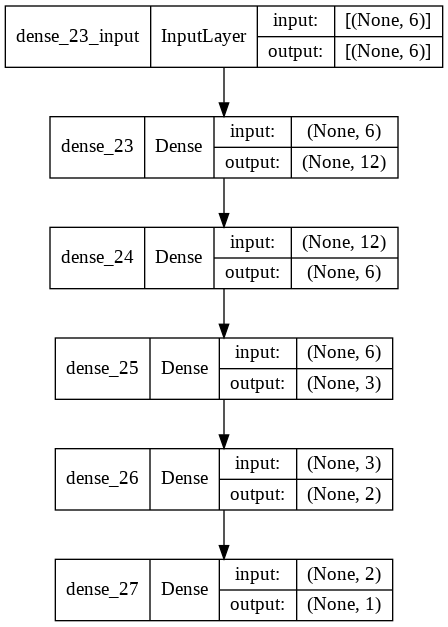

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(12, activation = 'relu', input_dim = 6))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 46.
Epoch 00056: early stopping


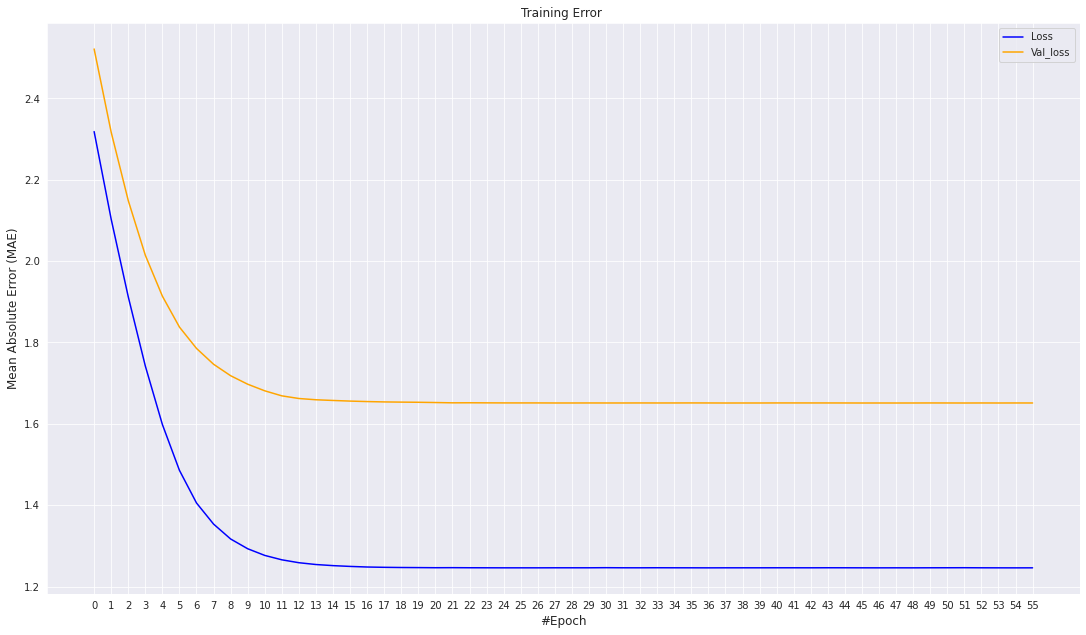

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.651212453842163'

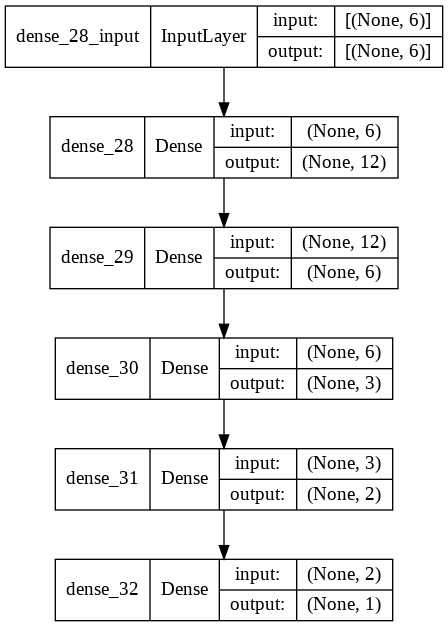

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Exploratory regression experiments with extended dataset


## Experiments after column selection

In [67]:
extended_runs.columns

Index(['RUNNUMBER', 'MaxWidth', 'MinWidth', 'NumberOfOrders', 'AverageWidth',
       'Deviation', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9',
       'W10', 'AVOrders1', 'AVOrders2', 'AVOrders3', 'AVOrders4', 'AVOrders5',
       'AVOrders6', 'AVOrders7', 'AVOrders8', 'AVOrders9', 'AVOrders10',
       'MultiplicationOfReels1', 'MultiplicationOfReels2',
       'MultiplicationOfReels3', 'MultiplicationOfReels4',
       'MultiplicationOfReels5', 'MultiplicationOfReels6',
       'MultiplicationOfReels7', 'MultiplicationOfReels8',
       'MultiplicationOfReels9', 'MultiplicationOfReels10', 'Dev1', 'Dev2',
       'Dev3', 'Dev4', 'Dev5', 'Dev6', 'Dev7', 'Dev8', 'Dev9', 'Dev10', 'Avg1',
       'Avg2', 'Avg3', 'Avg4', 'Avg5', 'Avg6', 'Avg7', 'Avg8', 'Avg9', 'Avg10',
       'Min1', 'Min2', 'Min3', 'Min4', 'Min5', 'Min6', 'Min7', 'Min8', 'Min9',
       'Min10', 'Max1', 'Max2', 'Max3', 'Max4', 'Max5', 'Max6', 'Max7', 'Max8',
       'Max9', 'Max10', 'WeightedAverage1', 'WeightedAverage2',
 

In [68]:
extended_runs = extended_runs.drop(columns=['Class'])

In [69]:
extended_runs_with_selected_columns = extended_runs.drop(columns=['RUNNUMBER', 'MaxWidth', 'MinWidth', 'NumberOfOrders', 'AverageWidth',
        'Deviation', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10','MultiplicationOfReels1', 'MultiplicationOfReels2',
       'MultiplicationOfReels3', 'MultiplicationOfReels4',
       'MultiplicationOfReels5', 'MultiplicationOfReels6',
       'MultiplicationOfReels7', 'MultiplicationOfReels8',
       'MultiplicationOfReels9', 'MultiplicationOfReels10','Min1', 'Min2', 'Min3', 'Min4', 'Min5', 'Min6', 'Min7', 'Min8', 'Min9',
       'Min10', 'Max1', 'Max2', 'Max3', 'Max4', 'Max5', 'Max6', 'Max7', 'Max8',
       'Max9', 'Max10'])

In [70]:
extended_runs_with_selected_columns

AVOrders1   AVOrders2  ...  WeightedAverage10  TOTALWASTEPERCENT
0    144.801009  356.297899  ...        5923.613051           0.628959
1      0.000000  154.191064  ...           0.000000           4.398778
2      0.000000    0.000000  ...        6100.000000           7.828784
3     17.937234  168.177585  ...        6024.354423           3.385417
4    203.757039  425.171612  ...        5990.640015           1.081588
..          ...         ...  ...                ...                ...
559    0.000000    0.000000  ...        5945.932104           1.762372
560    0.000000  199.682027  ...        5808.053156           4.239353
561    0.000000    0.000000  ...        5761.073493           5.033417
562    0.000000   48.160489  ...           0.000000           4.259620
563    0.000000    0.000000  ...        5872.083185           2.755251

[564 rows x 41 columns]

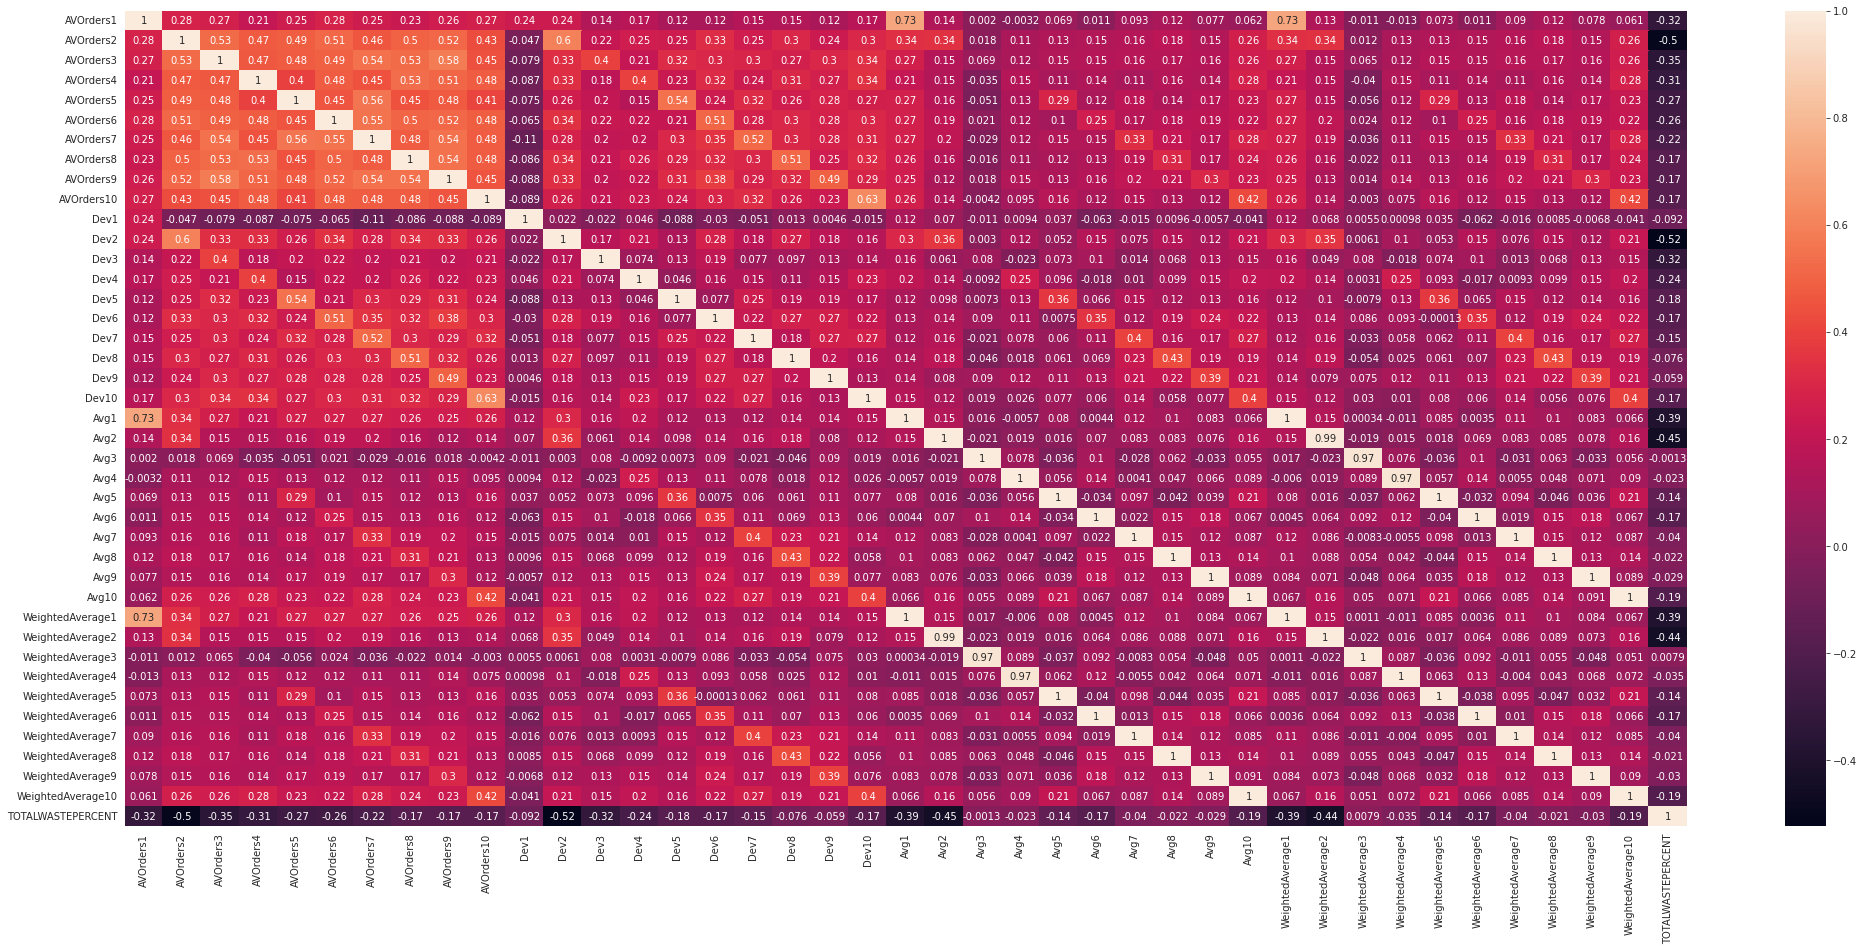

In [71]:
plot_corr_matrix(extended_runs_with_selected_columns)

In [72]:
X = extended_runs_with_selected_columns.fillna(0).drop(columns=['TOTALWASTEPERCENT'])
y = extended_runs_with_selected_columns['TOTALWASTEPERCENT']

In [73]:
X

AVOrders1   AVOrders2  ...  WeightedAverage9  WeightedAverage10
0    144.801009  356.297899  ...          0.000000        5923.613051
1      0.000000  154.191064  ...       5608.050258           0.000000
2      0.000000    0.000000  ...       5557.505498        6100.000000
3     17.937234  168.177585  ...       5368.663566        6024.354423
4    203.757039  425.171612  ...       5300.000000        5990.640015
..          ...         ...  ...               ...                ...
559    0.000000    0.000000  ...          0.000000        5945.932104
560    0.000000  199.682027  ...       5364.976942        5808.053156
561    0.000000    0.000000  ...       5131.900538        5761.073493
562    0.000000   48.160489  ...       5579.628680           0.000000
563    0.000000    0.000000  ...       5300.000000        5872.083185

[564 rows x 40 columns]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [75]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[19:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [76]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000097
0                 Linear regression  ...             0.000023
2                        ElasticNet  ...             0.000020
3                     BayesianRidge  ...             0.000022
6                    XGBRFRegressor  ...             0.000013
5             DecisionTreeRegressor  ...             0.000015
7  Polynomial regression 2nd degree  ...             0.000004
8  Polynomial regression 3nd degree  ...             0.000019
1                     SGD regressor  ...             0.000021

[9 rows x 5 columns]

## Results with stratified K fold validation

In [77]:
results = test_regression_models_with_K_Fold_Validation(X, y)

In [78]:
results

Model name  Mean absolute error
4             RandomForestRegressor         8.477342e-01
6                    XGBRFRegressor         9.243227e-01
3                     BayesianRidge         1.004410e+00
2                        ElasticNet         1.007920e+00
0                 Linear regression         1.013451e+00
5             DecisionTreeRegressor         1.211883e+00
8  Polynomial regression 3nd degree         2.572861e+00
7  Polynomial regression 2nd degree         2.937458e+00
1                     SGD regressor         1.171673e+17

## Pass input from MinMaxScaler

In [79]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [80]:
results = test_regression_models_with_K_Fold_Validation(x_scaled, y)

In [81]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.856938
6                    XGBRFRegressor             0.924281
3                     BayesianRidge             0.986766
1                     SGD regressor             1.011840
0                 Linear regression             1.013451
5             DecisionTreeRegressor             1.199154
2                        ElasticNet             1.430649
8  Polynomial regression 3nd degree             1.533818
7  Polynomial regression 2nd degree             3.094377

In [82]:
X.columns

Index(['AVOrders1', 'AVOrders2', 'AVOrders3', 'AVOrders4', 'AVOrders5',
       'AVOrders6', 'AVOrders7', 'AVOrders8', 'AVOrders9', 'AVOrders10',
       'Dev1', 'Dev2', 'Dev3', 'Dev4', 'Dev5', 'Dev6', 'Dev7', 'Dev8', 'Dev9',
       'Dev10', 'Avg1', 'Avg2', 'Avg3', 'Avg4', 'Avg5', 'Avg6', 'Avg7', 'Avg8',
       'Avg9', 'Avg10', 'WeightedAverage1', 'WeightedAverage2',
       'WeightedAverage3', 'WeightedAverage4', 'WeightedAverage5',
       'WeightedAverage6', 'WeightedAverage7', 'WeightedAverage8',
       'WeightedAverage9', 'WeightedAverage10'],
      dtype='object')

## Pass input from StandardScaler

In [83]:
standardScaler = preprocessing.StandardScaler()
x_standarized = standardScaler.fit_transform(X)

In [84]:
x_standarized = pd.DataFrame(x_standarized, columns=['AVOrders1', 'AVOrders2', 'AVOrders3', 'AVOrders4', 'AVOrders5',
       'AVOrders6', 'AVOrders7', 'AVOrders8', 'AVOrders9', 'AVOrders10',
       'Dev1', 'Dev2', 'Dev3', 'Dev4', 'Dev5', 'Dev6', 'Dev7', 'Dev8', 'Dev9',
       'Dev10', 'Avg1', 'Avg2', 'Avg3', 'Avg4', 'Avg5', 'Avg6', 'Avg7', 'Avg8',
       'Avg9', 'Avg10', 'WeightedAverage1', 'WeightedAverage2',
       'WeightedAverage3', 'WeightedAverage4', 'WeightedAverage5',
       'WeightedAverage6', 'WeightedAverage7', 'WeightedAverage8',
       'WeightedAverage9', 'WeightedAverage10'])

In [85]:
results = test_regression_models_with_K_Fold_Validation(x_standarized, y)

In [86]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.850773
6                    XGBRFRegressor             0.924323
3                     BayesianRidge             0.987126
0                 Linear regression             1.013451
1                     SGD regressor             1.014523
2                        ElasticNet             1.148339
5             DecisionTreeRegressor             1.205085
8  Polynomial regression 3nd degree             1.302733
7  Polynomial regression 2nd degree             3.169646

## Model tuning

### Bayesian ridge regressor tuning

In [ ]:
random_grid = {"n_iter": np.arange(100, 10000, 100),
                      "alpha_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "alpha_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "fit_intercept" : [True, False],
                      "normalize": [True, False]
                      }
br = BayesianRidge()
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(x_standarized, y)
br_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha_1': 1e-06,
 'alpha_2': 1e-05,
 'fit_intercept': True,
 'lambda_1': 0.01,
 'lambda_2': 1e-07,
 'n_iter': 3400,
 'normalize': False}

In [87]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
br = BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400)
'MAE :%.3f' % (-1*(mean(cross_val_score(br, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.987'

In [90]:
feature_importance = calculate_feature_importance(BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400), x_standarized, y, True)

In [91]:
feature_importance

Column name   weights
7           AVOrders8  0.214744
9          AVOrders10  0.202533
23               Avg4  0.182979
8           AVOrders9  0.168271
18               Dev9  0.093837
17               Dev8  0.069865
37   WeightedAverage8  0.063669
32   WeightedAverage3  0.061900
6           AVOrders7  0.061371
15               Dev6  0.037041
27               Avg8  0.036089
26               Avg7  0.030471
4           AVOrders5  0.025625
38   WeightedAverage9  0.016318
28               Avg9  0.015784
5           AVOrders6  0.015282
19              Dev10  0.002987
36   WeightedAverage7 -0.009476
39  WeightedAverage10 -0.031827
29              Avg10 -0.036563
34   WeightedAverage5 -0.048541
24               Avg5 -0.062443
22               Avg3 -0.064593
16               Dev7 -0.073290
14               Dev5 -0.082011
0           AVOrders1 -0.087388
35   WeightedAverage6 -0.088573
25               Avg6 -0.099218
33   WeightedAverage4 -0.103331
10               Dev1 -0.105453
13               Dev4 -0.109043
31   WeightedAverage2 -0.133608
3           AVOrders4 -0.168092
2           AVOrders3 -0.191887
30   WeightedAverage1 -0.197146
20               Avg1 -0.201815
21               Avg2 -0.267382
12               Dev3 -0.291627
11               Dev2 -0.426900
1           AVOrders2 -0.457077

### Random forest regressor tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# Fit the random search model
rf_random.fit(x_standarized, y)
# Fit the random search model
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [92]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(max_depth =80, min_samples_leaf= 4, min_samples_split = 5 ,n_estimators= 200)
'MAE :%.3f' % (-1*(mean(cross_val_score(rf, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.841'

In [93]:
feature_importance = calculate_feature_importance(RandomForestRegressor(max_depth =80, min_samples_leaf= 4, min_samples_split = 5 ,n_estimators= 200), x_standarized, y)

In [94]:
feature_importance

Column name  feature importance
1           AVOrders2            0.491201
0           AVOrders1            0.087240
2           AVOrders3            0.053650
4           AVOrders5            0.046181
8           AVOrders9            0.021834
9          AVOrders10            0.020883
32   WeightedAverage3            0.018864
11               Dev2            0.017837
7           AVOrders8            0.016333
12               Dev3            0.015257
31   WeightedAverage2            0.013840
35   WeightedAverage6            0.013481
22               Avg3            0.012166
5           AVOrders6            0.012034
37   WeightedAverage8            0.009581
3           AVOrders4            0.009511
38   WeightedAverage9            0.009193
17               Dev8            0.008466
27               Avg8            0.007849
18               Dev9            0.007591
34   WeightedAverage5            0.007258
25               Avg6            0.006876
28               Avg9            0.006651
30   WeightedAverage1            0.006514
14               Dev5            0.006424
39  WeightedAverage10            0.006191
16               Dev7            0.005988
36   WeightedAverage7            0.005819
6           AVOrders7            0.005761
23               Avg4            0.005591
13               Dev4            0.005499
26               Avg7            0.005386
33   WeightedAverage4            0.005334
20               Avg1            0.005172
24               Avg5            0.004945
19              Dev10            0.004598
21               Avg2            0.004553
15               Dev6            0.004542
29              Avg10            0.003908
10               Dev1            0.000000

### Decision tree regressor tuning

In [ ]:
criterion = ['squared_error', 'friedman_mse', "absolute_error", "poisson"]
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(x_standarized, y)
dtr_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [95]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, max_features= 'sqrt', min_samples_leaf=4, min_samples_split=2, splitter= 'random')
'DecisionTreeClassifier after tuning MAE :%.3f' % (-1*(mean(cross_val_score(dtr, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'DecisionTreeClassifier after tuning MAE :1.135'

In [97]:
feature_importance = calculate_feature_importance(DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, max_features= 'sqrt', min_samples_leaf=4, min_samples_split=2, splitter= 'random'), x_standarized, y)

In [98]:
feature_importance

Column name  feature importance
1           AVOrders2            0.233309
31   WeightedAverage2            0.193962
20               Avg1            0.071508
21               Avg2            0.071478
8           AVOrders9            0.052840
4           AVOrders5            0.052157
13               Dev4            0.051298
32   WeightedAverage3            0.036859
34   WeightedAverage5            0.032998
30   WeightedAverage1            0.028450
14               Dev5            0.028034
28               Avg9            0.023589
29              Avg10            0.021901
2           AVOrders3            0.016869
23               Avg4            0.012608
22               Avg3            0.009977
11               Dev2            0.008072
17               Dev8            0.008003
19              Dev10            0.007862
33   WeightedAverage4            0.006415
3           AVOrders4            0.006112
36   WeightedAverage7            0.005247
0           AVOrders1            0.003727
39  WeightedAverage10            0.003407
18               Dev9            0.003314
24               Avg5            0.003082
35   WeightedAverage6            0.002456
6           AVOrders7            0.001422
12               Dev3            0.001338
25               Avg6            0.000866
7           AVOrders8            0.000621
15               Dev6            0.000219
9          AVOrders10            0.000001
26               Avg7            0.000000
27               Avg8            0.000000
16               Dev7            0.000000
5           AVOrders6            0.000000
37   WeightedAverage8            0.000000
38   WeightedAverage9            0.000000
10               Dev1            0.000000

### Elastic net regressor tuning

In [99]:
random_grid = {"max_iter": [1, 5, 10, 100, 1000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "selection": ["cyclic", "random"]}
en = ElasticNet()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
en_random.fit(x_standarized, y)
en_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1, 'l1_ratio': 0.4, 'max_iter': 100, 'selection': 'cyclic'}

In [100]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'ElasticNet after tuning MAE :%.3f' % (-1*(mean(cross_val_score(ElasticNet(alpha=0.1, l1_ratio=0.4, max_iter = 100, selection= 'cyclic'), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'ElasticNet after tuning MAE :0.967'

In [101]:
feature_importance = calculate_feature_importance(ElasticNet(alpha=0.1, l1_ratio=0.4, max_iter = 100, selection= 'cyclic'), x_standarized, y, True)

In [102]:
feature_importance

Column name   weights
7           AVOrders8  0.168331
9          AVOrders10  0.148720
8           AVOrders9  0.133159
18               Dev9  0.065035
37   WeightedAverage8  0.058937
23               Avg4  0.046536
17               Dev8  0.039205
27               Avg8  0.005208
15               Dev6  0.000000
26               Avg7  0.000000
19              Dev10  0.000000
16               Dev7 -0.000000
32   WeightedAverage3  0.000000
28               Avg9  0.000000
36   WeightedAverage7  0.000000
33   WeightedAverage4  0.000000
6           AVOrders7  0.000000
5           AVOrders6  0.000000
4           AVOrders5  0.000000
38   WeightedAverage9  0.000000
22               Avg3 -0.000000
39  WeightedAverage10 -0.006266
29              Avg10 -0.015370
34   WeightedAverage5 -0.026586
14               Dev5 -0.034770
35   WeightedAverage6 -0.038049
24               Avg5 -0.056727
25               Avg6 -0.061264
13               Dev4 -0.069268
10               Dev1 -0.077336
0           AVOrders1 -0.077359
31   WeightedAverage2 -0.079522
3           AVOrders4 -0.106970
2           AVOrders3 -0.134221
30   WeightedAverage1 -0.179373
20               Avg1 -0.189386
12               Dev3 -0.270805
21               Avg2 -0.300359
11               Dev2 -0.406780
1           AVOrders2 -0.440106

### SGD regressor tuning

In [103]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l1_ratio = np.arange(0.05, 1.0, 0.05)
max_iter = np.arange(100, 10000, 100)
tolerance = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epsilon = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate =  ['invscaling', 'constant', 'optimal', 'adaptive']

random_grid = {'penalty':penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'tol': tolerance,
               'epsilon': epsilon,
               'learning_rate': learning_rate}
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
sgd_random.fit(x_standarized, y)
sgd_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'epsilon': 1e-06,
 'l1_ratio': 0.55,
 'learning_rate': 'adaptive',
 'max_iter': 700,
 'penalty': 'elasticnet',
 'tol': 1e-09}

In [104]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'SGD after tuning MAE :%.3f' % (-1*(mean(cross_val_score(SGDRegressor(alpha=0.1, l1_ratio=0.55, epsilon=1e-06, learning_rate='adaptive', max_iter = 700, penalty= 'elasticnet', tol=1e-09), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'SGD after tuning MAE :0.968'

In [105]:
feature_importance = calculate_feature_importance(SGDRegressor(alpha=0.1, l1_ratio=0.55, epsilon=1e-06, learning_rate='adaptive', max_iter = 700, penalty= 'elasticnet', tol=1e-09), x_standarized, y, True)

In [106]:
feature_importance

Column name   weights
7           AVOrders8  0.157384
9          AVOrders10  0.122371
8           AVOrders9  0.105863
37   WeightedAverage8  0.057240
18               Dev9  0.054093
23               Avg4  0.021611
17               Dev8  0.008316
39  WeightedAverage10  0.000000
16               Dev7  0.000000
29              Avg10  0.000000
28               Avg9  0.000000
27               Avg8  0.000000
26               Avg7  0.000000
22               Avg3  0.000000
33   WeightedAverage4  0.000000
19              Dev10  0.000000
15               Dev6  0.000000
36   WeightedAverage7  0.000000
6           AVOrders7  0.000000
5           AVOrders6  0.000000
4           AVOrders5  0.000000
38   WeightedAverage9  0.000000
32   WeightedAverage3  0.000000
14               Dev5 -0.010325
34   WeightedAverage5 -0.012283
35   WeightedAverage6 -0.013637
31   WeightedAverage2 -0.041432
13               Dev4 -0.054488
25               Avg6 -0.056938
10               Dev1 -0.062769
24               Avg5 -0.065579
0           AVOrders1 -0.073216
3           AVOrders4 -0.082564
2           AVOrders3 -0.115223
30   WeightedAverage1 -0.174251
20               Avg1 -0.186268
12               Dev3 -0.267189
21               Avg2 -0.330193
11               Dev2 -0.398920
1           AVOrders2 -0.439328

## Deep learning experiments


We will continue experiments by using deep learning

In [ ]:
X

MaxWidth  MinWidth  ...  WeightedAverage9  WeightedAverage10
0        6100       500  ...          0.000000        5923.613051
1        5800       900  ...       5608.050258           0.000000
2        6100      1500  ...       5557.505498        6100.000000
3        6100       500  ...       5368.663566        6024.354423
4        6100       400  ...       5300.000000        5990.640015
..        ...       ...  ...               ...                ...
559      6000      1500  ...          0.000000        5945.932104
560      5900      1200  ...       5364.976942        5808.053156
561      5800      1300  ...       5131.900538        5761.073493
562      5700      1200  ...       5579.628680           0.000000
563      6100      1300  ...       5300.000000        5872.083185

[564 rows x 35 columns]

In [ ]:
epochs = 4000
batch_size = 2

### Single dense model experiments

In [ ]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 25.
Epoch 00035: early stopping


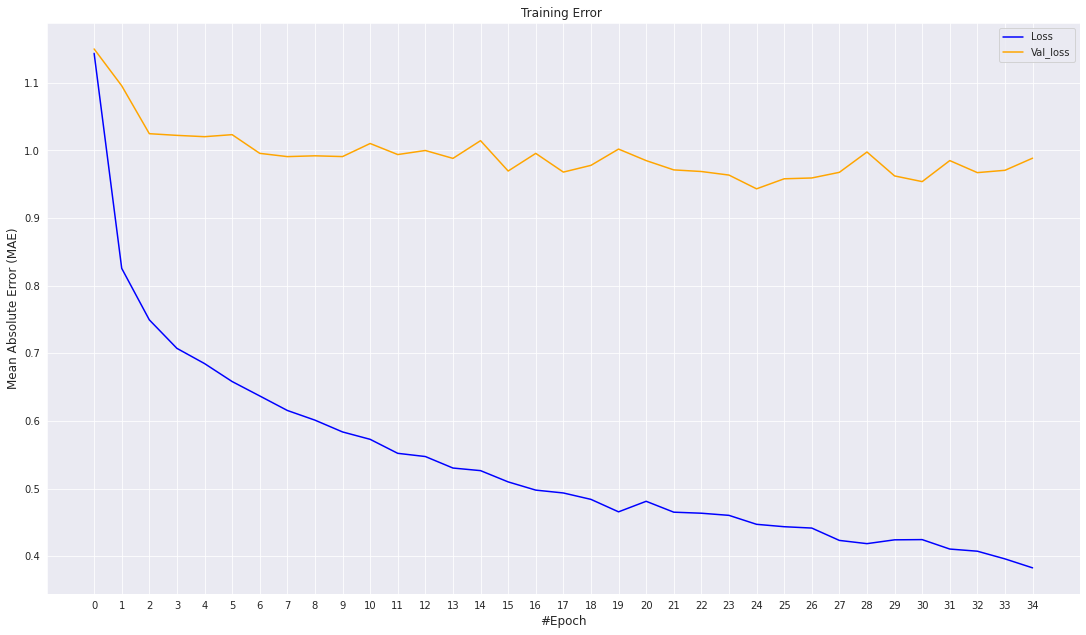

In [ ]:
plot_loss_and_val_loss(hist)

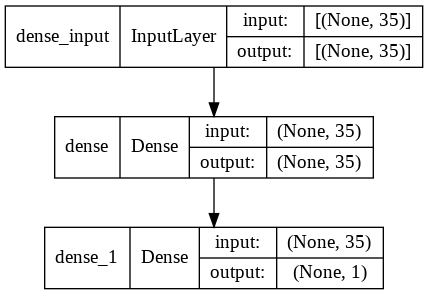

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 16.
Epoch 00026: early stopping


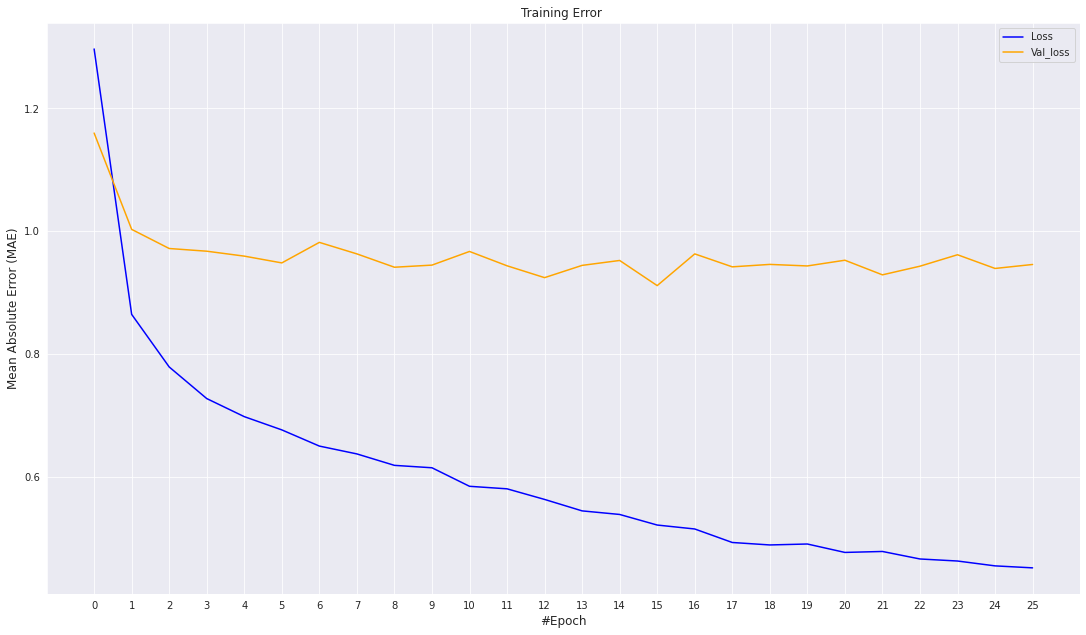

In [ ]:
plot_loss_and_val_loss(hist)

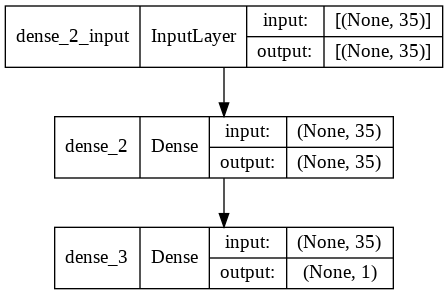

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Two denses model experiments

In [ ]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 10.
Epoch 00020: early stopping


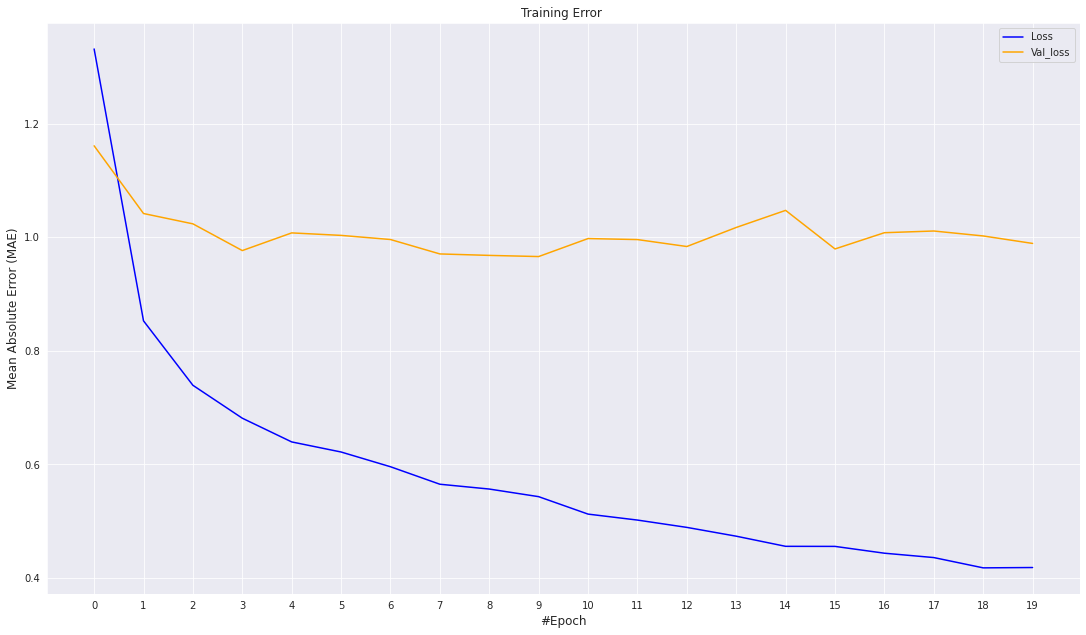

In [ ]:
plot_loss_and_val_loss(hist)

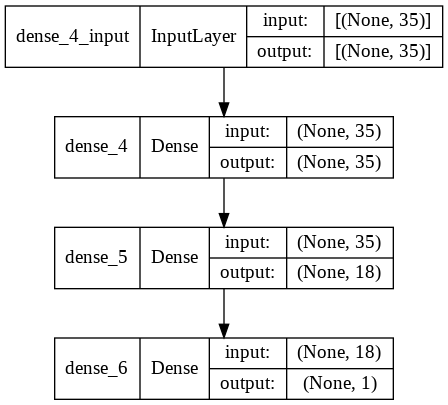

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 22.
Epoch 00032: early stopping


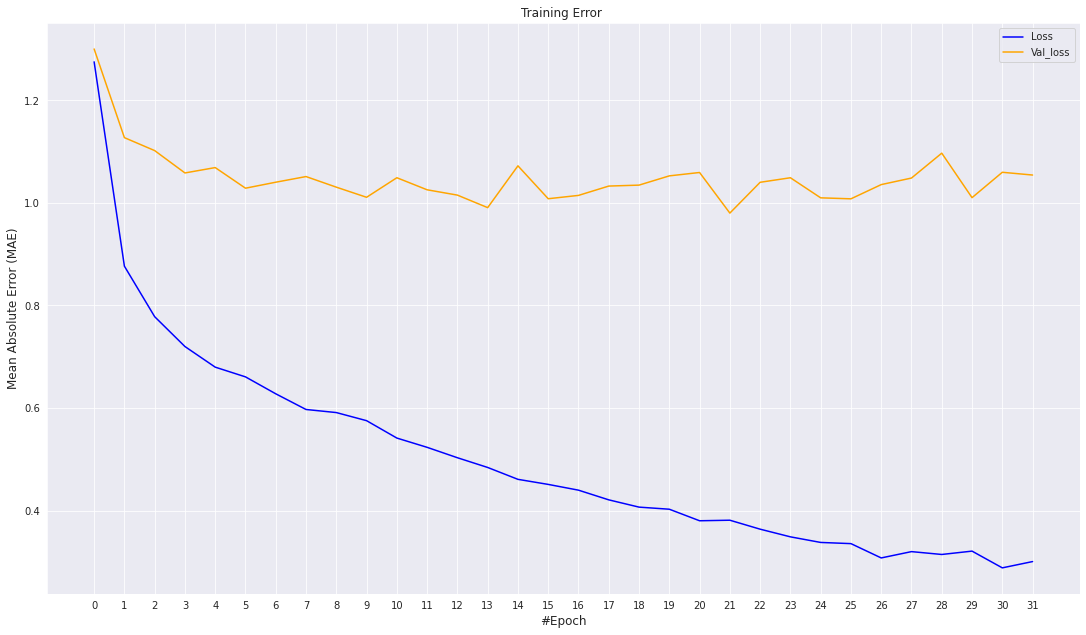

In [ ]:
plot_loss_and_val_loss(hist)

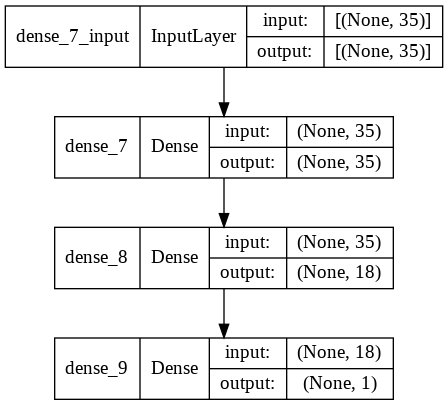

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Three denses model experiments

In [ ]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 8.
Epoch 00018: early stopping


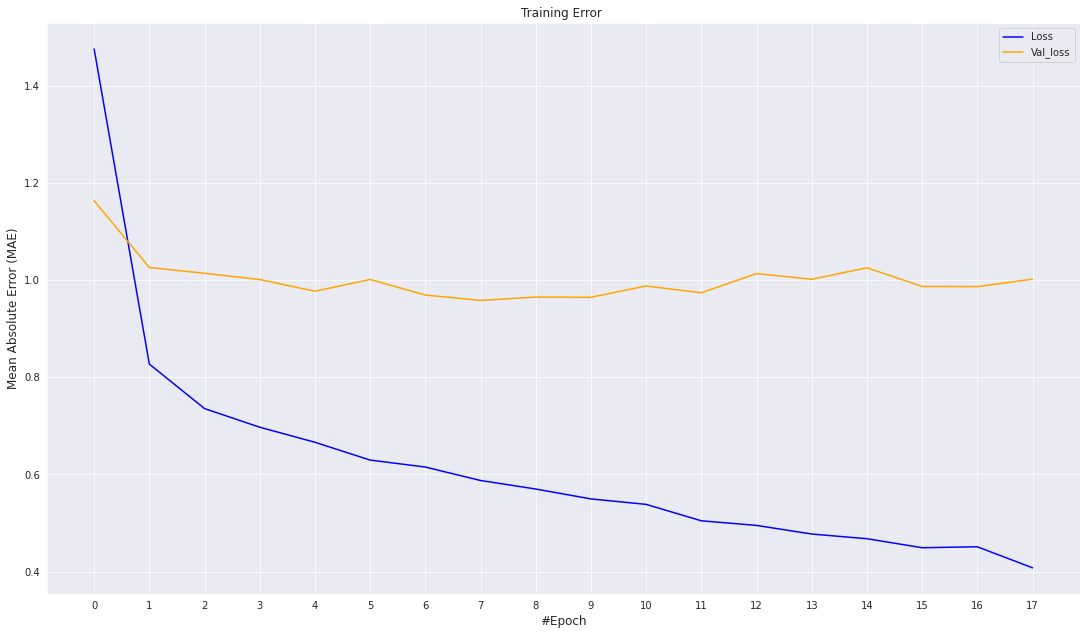

In [ ]:
plot_loss_and_val_loss(hist)

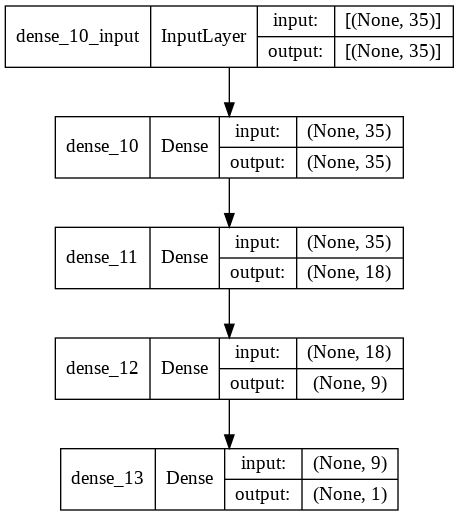

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 13.
Epoch 00023: early stopping


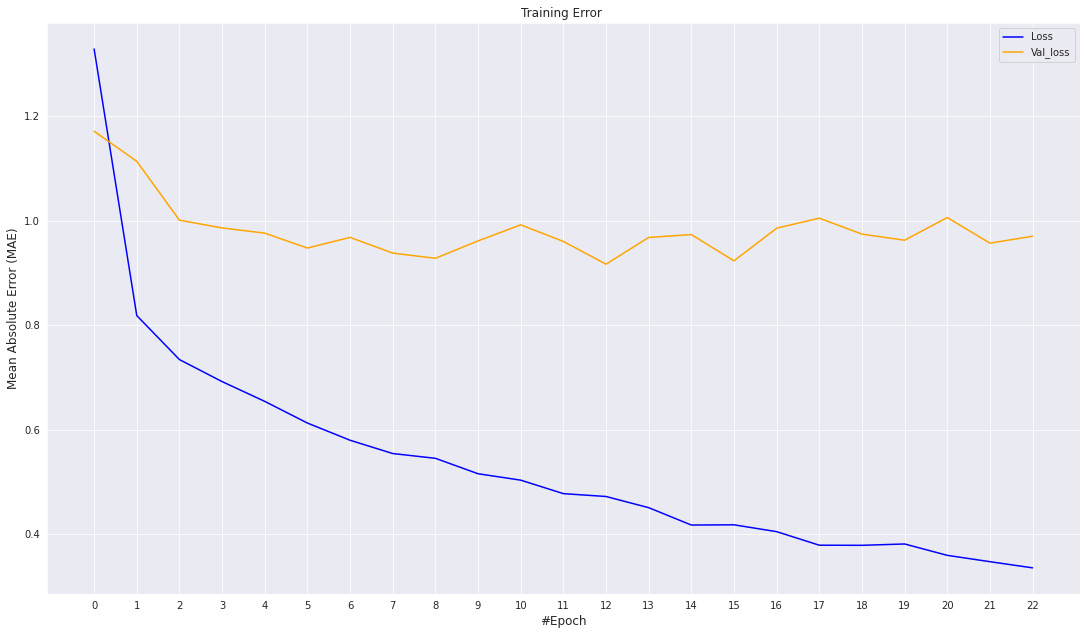

In [ ]:
plot_loss_and_val_loss(hist)

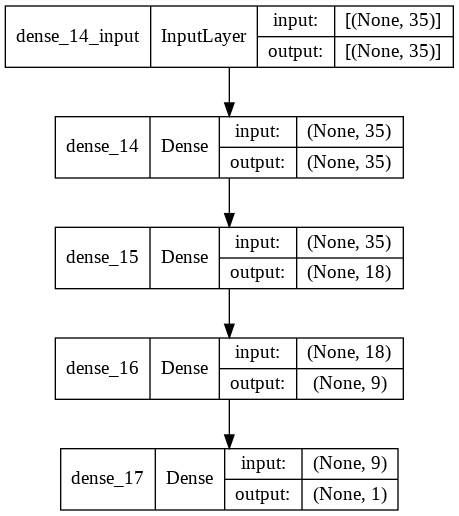

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Four denses model experiments

In [ ]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 5.
Epoch 00015: early stopping


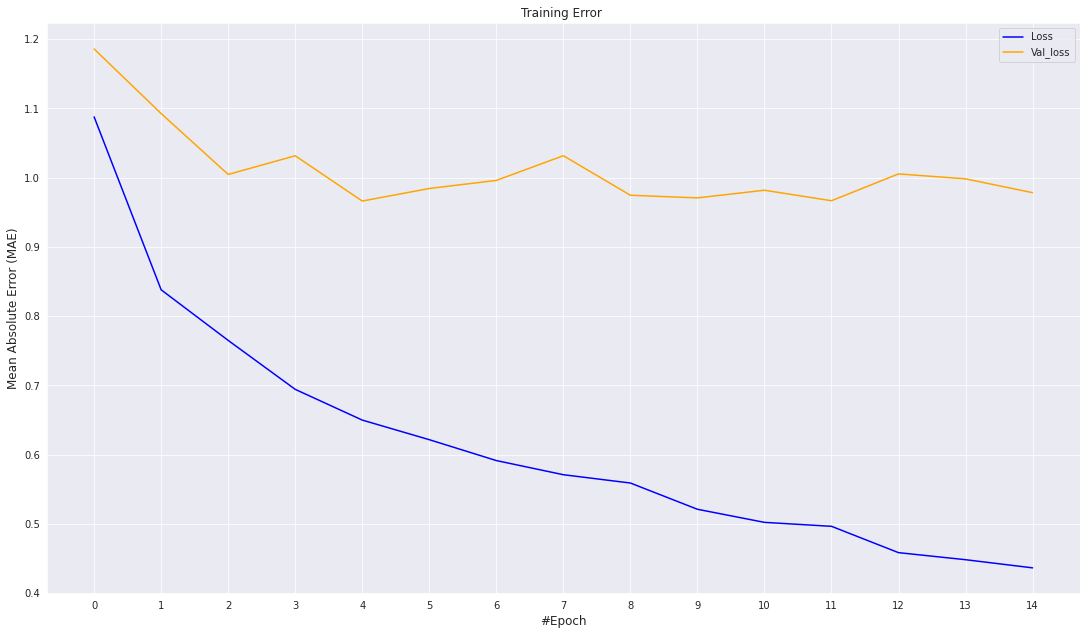

In [ ]:
plot_loss_and_val_loss(hist)

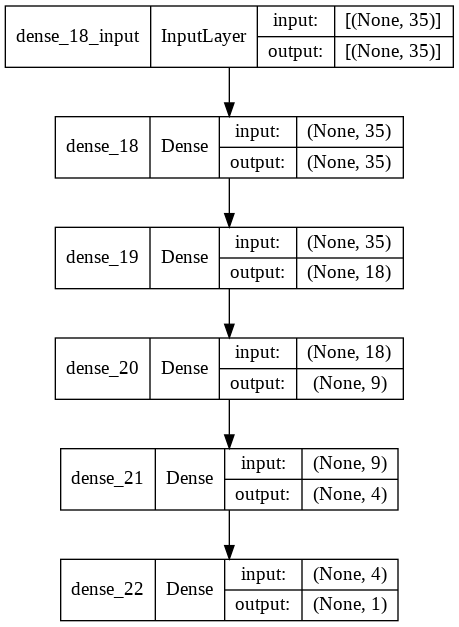

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 16.
Epoch 00026: early stopping


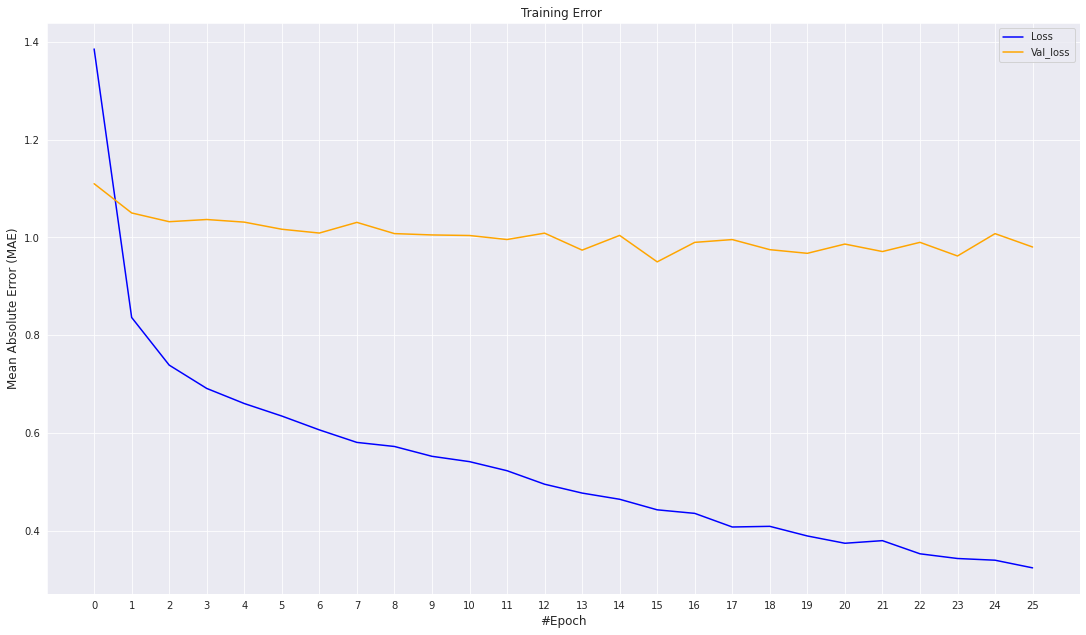

In [ ]:
plot_loss_and_val_loss(hist)

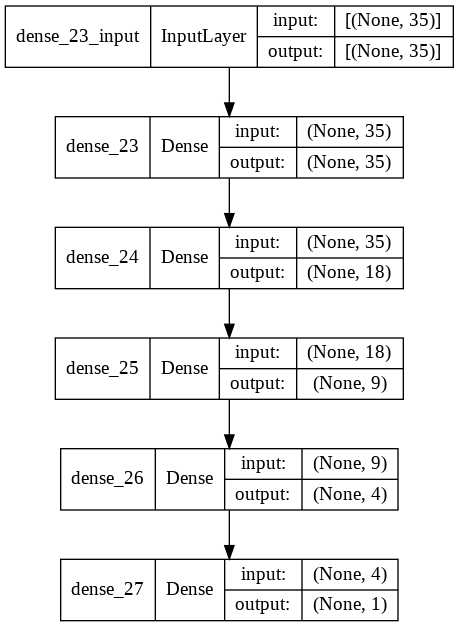

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Exploratory regression experiments with extended dataset after feature extraction using PCA


In [ ]:
X = extended_runs.drop(columns=['TOTALWASTEPERCENT'])
y = extended_runs['TOTALWASTEPERCENT']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
x_principalComponents = pca.fit_transform(X)

In [ ]:
x_principalComponents

array([[-1.64106996e+06,  1.95818476e+05,  1.65756189e+06,
        -4.39358821e+05, -1.06855036e+06,  7.68548703e+05],
       [-2.05327469e+06, -1.30498073e+06, -1.27869455e+06,
         3.51785420e+05,  5.44420767e+05,  3.36702567e+05],
       [-1.66990270e+06,  1.99951320e+05, -1.32910969e+05,
         4.46635752e+05,  1.37554616e+05,  4.90742575e+05],
       ...,
       [-1.70862602e+06, -2.23172969e+05, -3.48072856e+05,
         5.15589028e+05,  9.23599358e+05, -2.40370425e+05],
       [-2.03813328e+06,  1.47200209e+05, -3.67557762e+05,
        -5.68339760e+05,  1.27763450e+05,  2.88955250e+05],
       [-1.70636571e+06,  8.72366661e+05,  8.25072922e+05,
         8.73172496e+02,  2.59488402e+05,  4.23776841e+05]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[16:55:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000095
0                 Linear regression  ...             0.000034
3                     BayesianRidge  ...             0.000023
2                        ElasticNet  ...             0.000062
6                    XGBRFRegressor  ...             0.000021
5             DecisionTreeRegressor  ...             0.000016
7  Polynomial regression 2nd degree  ...             0.000051
8  Polynomial regression 3nd degree  ...             0.000244
1                     SGD regressor  ...             0.000077

[9 rows x 5 columns]

### Pass input from MinMaxScaler

In [ ]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[16:57:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
3                     BayesianRidge  ...             0.000003
4             RandomForestRegressor  ...             0.000090
0                 Linear regression  ...             0.000038
1                     SGD regressor  ...             0.000018
6                    XGBRFRegressor  ...             0.000006
5             DecisionTreeRegressor  ...             0.000002
8  Polynomial regression 3nd degree  ...             0.000165
7  Polynomial regression 2nd degree  ...             0.000051
2                        ElasticNet  ...             0.000004

[9 rows x 5 columns]

### Pass input from StandardScaler

In [ ]:
standardScaler = preprocessing.StandardScaler()
x_standarized = standardScaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[16:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000081
3                     BayesianRidge  ...             0.000002
0                 Linear regression  ...             0.000002
1                     SGD regressor  ...             0.000002
6                    XGBRFRegressor  ...             0.000005
5             DecisionTreeRegressor  ...             0.000001
8  Polynomial regression 3nd degree  ...             0.000237
7  Polynomial regression 2nd degree  ...             0.000043
2                        ElasticNet  ...             0.000007

[9 rows x 5 columns]

## Results with stratified K fold validation

In [ ]:
results = test_regression_models_with_K_Fold_Validation(x_standarized, y)

In [ ]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.820097
3                     BayesianRidge             0.889566
1                     SGD regressor             0.904304
6                    XGBRFRegressor             0.905648
0                 Linear regression             0.938838
2                        ElasticNet             1.021837
8  Polynomial regression 3nd degree             1.158382
5             DecisionTreeRegressor             1.178260
7  Polynomial regression 2nd degree             1.487580

## Model tuning

### Bayesian ridge regressor tuning

In [ ]:
¿01, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "fit_intercept" : [True, False],
                      "normalize": [True, False]
                      }
br = BayesianRidge()
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(x_standarized, y)
br_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha_1': 0.1,
 'alpha_2': 1e-05,
 'fit_intercept': True,
 'lambda_1': 1e-05,
 'lambda_2': 0.1,
 'n_iter': 6100,
 'normalize': False}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
br = BayesianRidge(alpha_1 = 0.1, alpha_2 = 1e-05, lambda_1 = 1e-05, lambda_2 = 0.1, n_iter = 6100, fit_intercept=True, normalize=False)
'MAE :%.3f' % (-1*(mean(cross_val_score(br, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.887'

### Random forest regressor tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_standarized, y)
# Fit the random search model
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(max_depth =10, min_samples_leaf= 4, min_samples_split = 5 ,n_estimators= 200, max_features='auto')
'MAE :%.3f' % (-1*(mean(cross_val_score(rf, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.810'

### Decision tree regressor tuning

In [ ]:
criterion = ['squared_error', 'friedman_mse', "absolute_error", "poisson"]
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(x_standarized, y)
dtr_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'criterion': 'friedman_mse',
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 60, max_features= 'sqrt', min_samples_leaf=4, min_samples_split=2, splitter= 'random')
'DecisionTreeClassifier after tuning MAE :%.3f' % (-1*(mean(cross_val_score(dtr, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'DecisionTreeClassifier after tuning MAE :1.109'

### Elastic net regressor tuning

In [ ]:
random_grid = {"max_iter": [1, 5, 10, 100, 1000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "selection": ["cyclic", "random"]}
en = ElasticNet()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
en_random.fit(x_standarized, y)
en_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 100, 'selection': 'cyclic'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'ElasticNet after tuning MAE :%.3f' % (-1*(mean(cross_val_score(ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter = 100, selection= 'cyclic'), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'ElasticNet after tuning MAE :0.875'

### SGD regressor tuning

In [ ]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l1_ratio = np.arange(0.05, 1.0, 0.05)
max_iter = np.arange(100, 10000, 100)
tolerance = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epsilon = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate =  ['invscaling', 'constant', 'optimal', 'adaptive']

random_grid = {'penalty':penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'tol': tolerance,
               'epsilon': epsilon,
               'learning_rate': learning_rate}
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
sgd_random.fit(x_standarized, y)
sgd_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'epsilon': 0.001,
 'l1_ratio': 0.6000000000000001,
 'learning_rate': 'invscaling',
 'max_iter': 4800,
 'penalty': 'l1',
 'tol': 1e-07}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'SGD after tuning MAE :%.3f' % (-1*(mean(cross_val_score(SGDRegressor(alpha=0.1, l1_ratio=0.01, epsilon=0.001, learning_rate='invscaling', max_iter = 4800, penalty= 'l1', tol=1e-07), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'SGD after tuning MAE :0.880'